# Plots for the paper

In [18]:
%load_ext autoreload
%autoreload 2

In [19]:
import numpy as np, glob, healpy as H, os, sys
from pylab import *

In [20]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'

In [21]:
folder_with_results = '/home/chunyul3/lensing_sys_fisher/files_for_paper/'
plfolder = 'plots/'

if not os.path.exists( plfolder ): os.system('mkdir -p %s' %(plfolder))

In [22]:
def format_axis(ax,fx,fy,maxxloc=None):
    for label in ax.get_xticklabels(): label.set_fontsize(fx)
    for label in ax.get_yticklabels(): label.set_fontsize(fy)
    if maxxloc is not None:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=maxxloc))
        ax.xaxis.set_major_locator(MaxNLocator(nbins=maxxloc))

    return ax


# Figure 1:
## Delensed residuals as a $\mathcal{f}$(noise level)

dict_keys([0.1, 0.2, 1.0, 2.0])
0.1
0.2
1.0
2.0


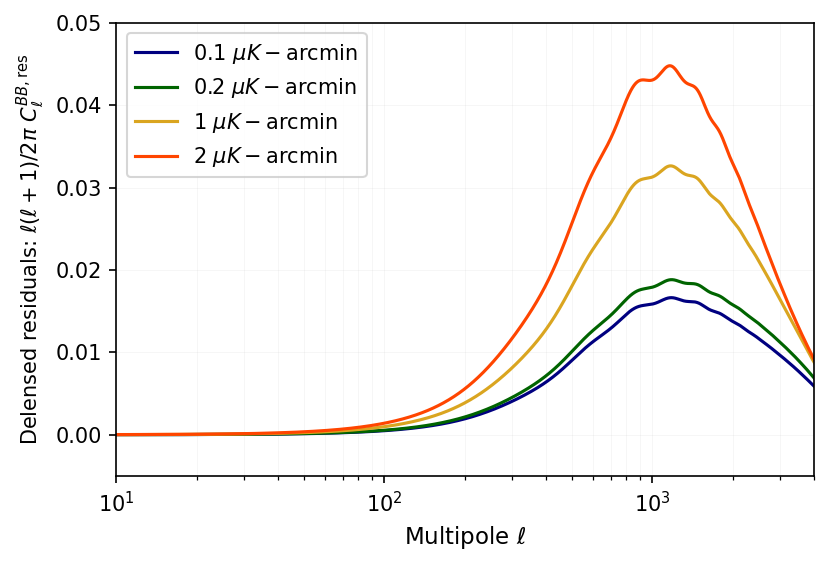

In [24]:
fname = '%s/delensedpower.npy' %(folder_with_results)
pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys())#; sys.exit()

noise_color_dic = {0.1: 'navy', 0.2: 'darkgreen', 1.: 'goldenrod', 2.: 'orangered'}
clf()
fsval = 11
xmin, xmax = 10., 4000.
ymin, ymax = -0.005, 0.05
xscaleval = 'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
for noiseval in sorted(pl_dict):
    print(noiseval)
    curr_cl_bb = pl_dict[noiseval]
    els = np.arange( len(curr_cl_bb) )
    dl_fac = els * (els+1) / 2/ np.pi
    plot(els, dl_fac * curr_cl_bb, color = noise_color_dic[noiseval], label = r'%g $\mu K{\rm -arcmin}$' %(noiseval))
legend(loc = 2, fontsize = fsval-1)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residuals: $\ell(\ell+1)/2\pi\ C_{\ell}^{BB, {\rm res}}$', fontsize = fsval-1)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_residuals_for_different_noise_levels.pdf'
savefig(plname, dpi = 200.)
show()


# Figure 2:
## Delensed residuals as a $\mathcal{f}$(noise level) compared with original lensed BB power.

(4999,)
dict_keys([0.1, 0.2, 1.0, 2.0])
0.1
0.2
1.0
2.0


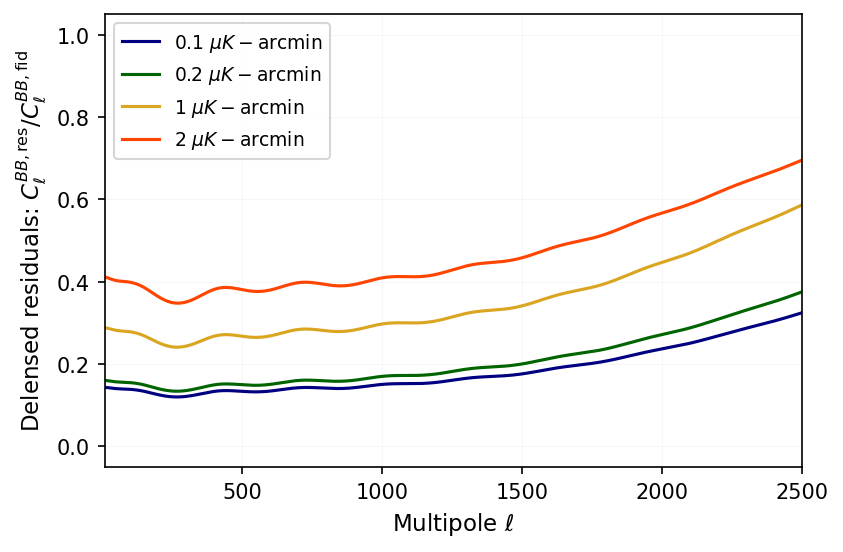

In [26]:
cl_bb_fid_name = '%s/clBB_fiducial.npy' %(folder_with_results)
cl_bb_fid = np.load(cl_bb_fid_name, allow_pickle=True)
print(cl_bb_fid.shape)

fname = '%s/delensedpower.npy' %(folder_with_results)
pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys())#; sys.exit()

noise_color_dic = {0.1: 'navy', 0.2: 'darkgreen', 1.: 'goldenrod', 2.: 'orangered'}
clf()
fsval = 11
xmin, xmax = 10., 2500.
ymin, ymax = -0.05, 1.05
xscaleval = None #'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
for noiseval in sorted(pl_dict):
    print(noiseval)
    curr_cl_bb = pl_dict[noiseval]
    els = np.arange( len(curr_cl_bb) )
    dl_fac = els * (els+1) / 2/ np.pi
    delensing_residual_ratio = curr_cl_bb / cl_bb_fid
    plot(els, delensing_residual_ratio, color = noise_color_dic[noiseval], label = r'%g $\mu K{\rm -arcmin}$' %(noiseval))
    #delensing_eff = (cl_bb_fid - curr_cl_bb) / cl_bb_fid
    #plot(els, delensing_eff, color = noise_color_dic[noiseval], ls = '-.')
legend(loc = 2, fontsize = fsval-2)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residuals: $C_{\ell}^{BB, {\rm res}} / C_{\ell}^{BB, {\rm fid}}$', fontsize = fsval)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_residuals_ratio_for_different_noise_levels.pdf'
savefig(plname, dpi = 200.)
show()

# Figure 3:
## Delensed residuals as a $\mathcal{f}(\gamma_{0})$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys([0.2, '0.2guess', 0.5, '0.5guess', 2.0, '2.0guess'])


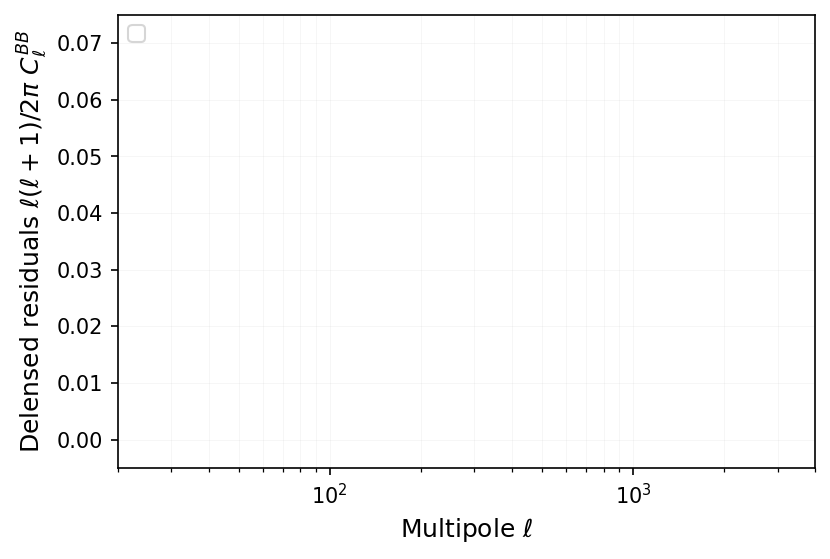

In [10]:
#noise = 2 uK-arcmin
#reqd_gamma_arr = [0.9] #[0.8, 0.95]
#fname = '%s/delensedpower_new_intep_gamma%s.npy' %(folder_with_results, reqd_gamma)
reqd_gamma_val = 0.9
#fname = '%s/delensedgamma%ss.npy' %(folder_with_results, reqd_gamma_val)
fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

#fname = '%s/delensedgamma1.1s.npy' %(folder_with_results)
pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys()); ##sys.exit()

gamma_color_dic = {0.8: 'navy', 0.9: 'darkgreen', 1.: 'goldenrod', 1.1: 'orangered', 1.15: 'darkred'}
clf()
fsval = 12
xmin, xmax = 20., 4000.
ymin, ymax = -0.005, 0.075
xscaleval = 'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
for keyname in pl_dict:
    if isinstance(keyname, str):
        if keyname.find('guess')>-1: continue
    else:
        pass #continue
    #if keyname in ['guess1.25', 'guess1.35', 'guess1.45']: continue
    if keyname in ['guess1.25', 'guess1.35', 'guess1.45']: continue
    if keyname not in gamma_color_dic: continue
    print(keyname)
    curr_res = pl_dict[keyname]
    els = np.arange( len(curr_res) )
    dl_fac = els * (els+1) / 2/ np.pi
    plot(els, dl_fac * curr_res, color = gamma_color_dic[keyname], label = r'$\gamma_{0} = %g$' %(keyname))
legend(loc = 2, fontsize = fsval-2)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residuals $\ell(\ell+1)/2\pi\ C_{\ell}^{BB}$', fontsize = fsval)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_residuals_for_gamma%s.pdf' %(reqd_gamma_val)
savefig(plname, dpi = 200.)
show()


dict_keys([0.2, '0.2guess', 0.5, '0.5guess', 2.0, '2.0guess'])
0.9
0.95
1.0
1.05
1.1


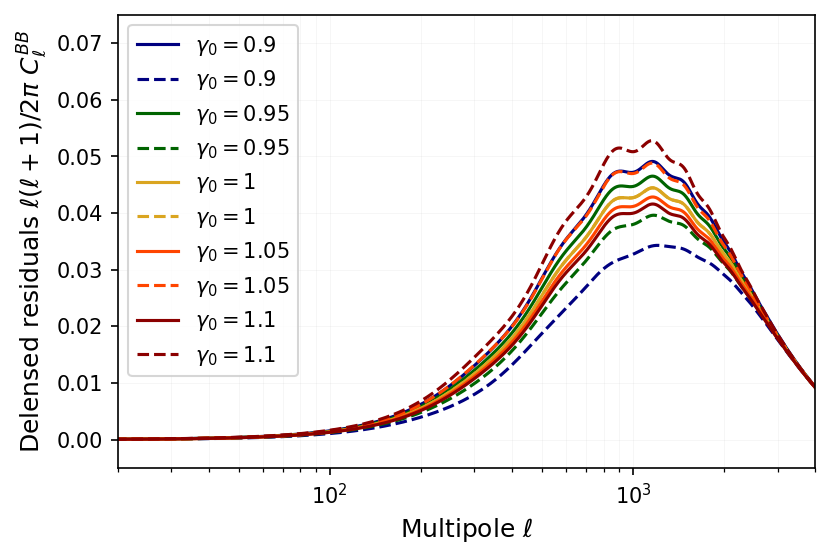

In [15]:
#noise = 2 uK-arcmin
#reqd_gamma_arr = [0.9] #[0.8, 0.95]
#fname = '%s/delensedpower_new_intep_gamma%s.npy' %(folder_with_results, reqd_gamma)
reqd_gamma_val = 0.9
#fname = '%s/delensedgamma%ss.npy' %(folder_with_results, reqd_gamma_val)
fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

#fname = '%s/delensedgamma1.1s.npy' %(folder_with_results)
pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys()); ##sys.exit()

#gamma_color_dic = {0.8: 'navy', 0.9: 'darkgreen', 1.: 'goldenrod', 1.1: 'orangered', 1.15: 'darkred'}
gamma_color_dic = {0.9: 'navy', 0.95: 'darkgreen', 1.: 'goldenrod', 1.05: 'orangered', 1.1: 'darkred'}
clf()
fsval = 12
xmin, xmax = 20., 4000.
ymin, ymax = -0.005, 0.075
xscaleval = 'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
for keyname in gamma_color_dic:
    print(keyname)
    fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, keyname)
    pl_dict = np.load(fname, allow_pickle=True).item()
    curr_res = pl_dict[2.0]
    curr_res_guess = pl_dict['2.0guess']
    els = np.arange( len(curr_res) )
    dl_fac = els * (els+1) / 2/ np.pi
    
    plot(els, dl_fac * curr_res, color = gamma_color_dic[keyname], label = r'$\gamma_{0} = %g$' %(keyname))
    plot(els, dl_fac * curr_res_guess, color = gamma_color_dic[keyname], linestyle = '--',label = r'$\gamma_{0} = %g$' %(keyname))
legend(loc = 2, fontsize = fsval-2)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residuals $\ell(\ell+1)/2\pi\ C_{\ell}^{BB}$', fontsize = fsval)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_residuals_for_gamma%s.pdf' %(reqd_gamma_val)
savefig(plname, dpi = 200.)
show()


dict_keys(['guess0.9', 0.9, 'guess0.95', 'guess1.0', 'guess1.05', 'guess1.1'])
0.9
0.95
1.0
1.05
1.1


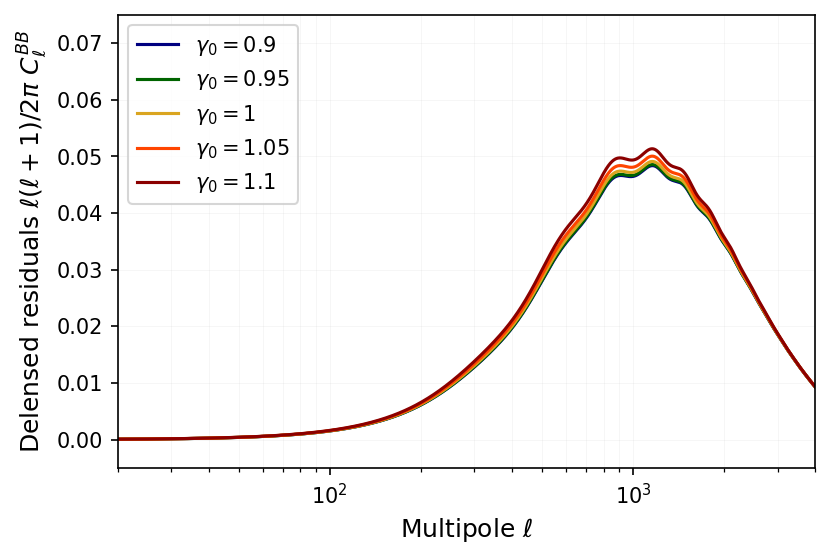

In [24]:
reqd_gamma_val = 0.90
fname = '%s/guess/delensedpower_iter0_guess_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict[2.0].keys()); ##sys.exit()

gamma_color_dic = {0.9: 'navy', 0.95: 'darkgreen', 1.: 'goldenrod', 1.05: 'orangered', 1.1: 'darkred'}
clf()
fsval = 12
xmin, xmax = 20., 4000.
ymin, ymax = -0.005, 0.075
xscaleval = 'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
for keyname in gamma_color_dic:
    print(keyname)
    curr_res = pl_dict[2.0]['guess%s'%(keyname)]
    els = np.arange( len(curr_res) )
    dl_fac = els * (els+1) / 2/ np.pi
    plot(els, dl_fac * curr_res, color = gamma_color_dic[keyname], label = r'$\gamma_{0} = %g$' %(keyname))
#plot(els, dl_fac * curr_res, color = gamma_color_dic[keyname], label = r'$\gamma_{0} = %g$' %(keyname))
legend(loc = 2, fontsize = fsval-2)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residuals $\ell(\ell+1)/2\pi\ C_{\ell}^{BB}$', fontsize = fsval)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_residuals_for_guess_gamma%s.pdf' %(reqd_gamma_val)
savefig(plname, dpi = 200.)
show()

dict_keys(['guess0.9', 1.1, 'guess0.95', 'guess1.0', 'guess1.05', 'guess1.1'])
0.9
0.95
1.0
1.05
1.1


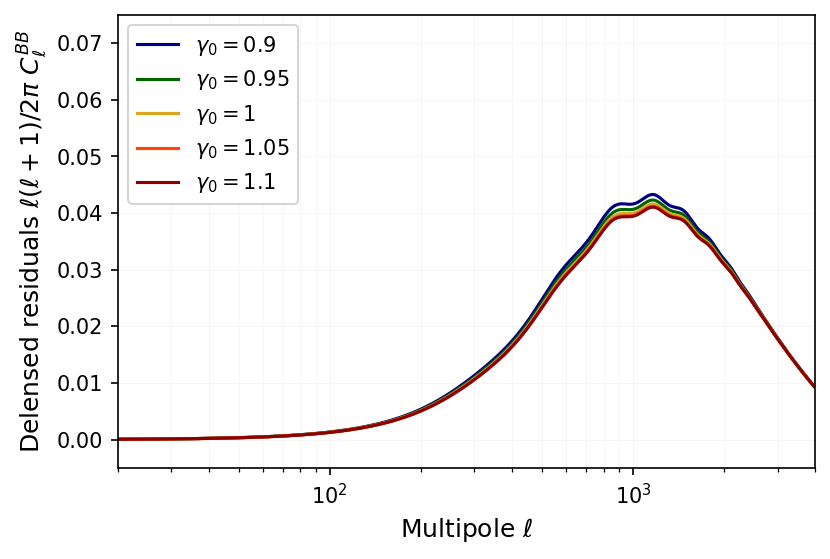

In [27]:
reqd_gamma_val = 1.10
fname = '%s/guess/delensedpower_iter0_guess_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict[2.0].keys()); ##sys.exit()

gamma_color_dic = {0.9: 'navy', 0.95: 'darkgreen', 1.: 'goldenrod', 1.05: 'orangered', 1.1: 'darkred'}
clf()
fsval = 12
xmin, xmax = 20., 4000.
ymin, ymax = -0.005, 0.075
xscaleval = 'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
for keyname in gamma_color_dic:
    print(keyname)
    curr_res = pl_dict[2.0]['guess%s'%(keyname)]
    els = np.arange( len(curr_res) )
    dl_fac = els * (els+1) / 2/ np.pi
    plot(els, dl_fac * curr_res, color = gamma_color_dic[keyname], label = r'$\gamma_{0} = %g$' %(keyname))
#plot(els, dl_fac * curr_res, color = gamma_color_dic[keyname], label = r'$\gamma_{0} = %g$' %(keyname))
legend(loc = 2, fontsize = fsval-2)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residuals $\ell(\ell+1)/2\pi\ C_{\ell}^{BB}$', fontsize = fsval)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_residuals_for_guess_gamma%s.pdf' %(reqd_gamma_val)
savefig(plname, dpi = 200.)
show()

# Figure 4:
## Delensed residuals as a $\mathcal{f}$(noiselevel) 

dict_keys([0.1, '0.1guess', 0.2, '0.2guess', 0.5, '0.5guess', 1.0, '1.0guess', 2.0, '2.0guess'])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

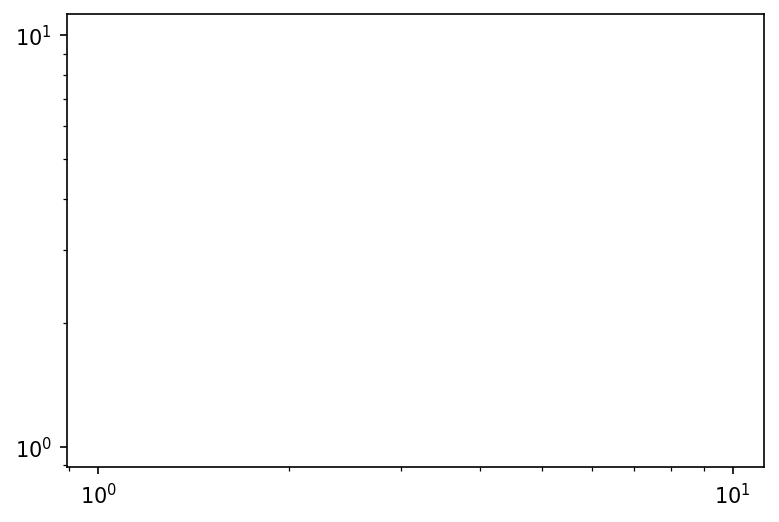

In [30]:
reqd_noise_level_arr = [0.2, 0.5, 2.0]
#fname = '%s/cresiter_new_intep_gamma0.95.npy' %(folder_with_results)
#fname = '%s/delensedpoweriter_new_intep_gamma0.9.npy' %(folder_with_results)
fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys())

clf()
ax = subplot(111, xscale = 'log', yscale = 'log')
for reqd_noise_level in reqd_noise_level_arr:
    for keyname in pl_dict[reqd_noise_level]:
        curr_res = pl_dict[reqd_noise_level][keyname]
        els = np.arange( len(curr_res) )
        dl_fac = els * (els+1) / 2/ np.pi
        plot(els, dl_fac * curr_res)
show()

dict_keys([0.1, '0.1guess', 0.2, '0.2guess', 0.5, '0.5guess', 1.0, '1.0guess', 2.0, '2.0guess'])


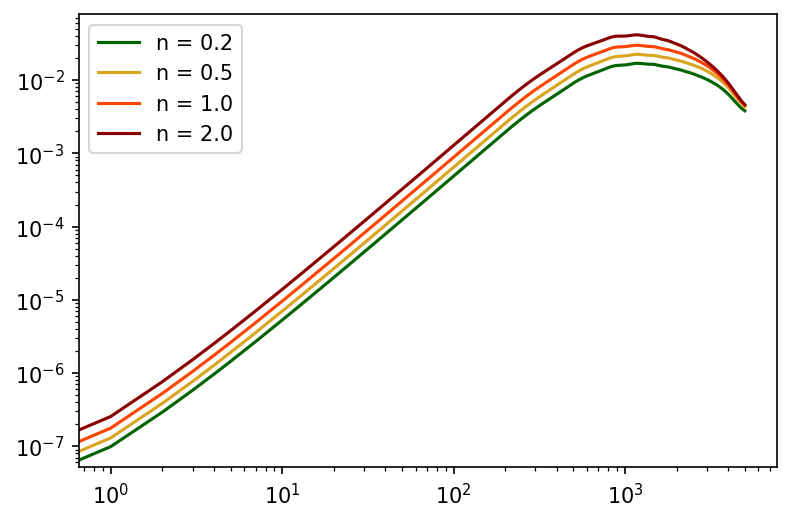

In [41]:
reqd_noise_level_arr = [0.2, 0.5, 1.0, 2.0]
#fname = '%s/cresiter_new_intep_gamma0.95.npy' %(folder_with_results)
#fname = '%s/delensedpoweriter_new_intep_gamma0.9.npy' %(folder_with_results)
fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys())
noise_color_dic = {0.1: 'navy', 0.2: 'darkgreen', 0.5: 'goldenrod', 1.0: 'orangered', 2.0: 'darkred'}

clf()
ax = subplot(111, xscale = 'log', yscale = 'log')
for reqd_noise_level in reqd_noise_level_arr:
        curr_res = pl_dict[reqd_noise_level]
        els = np.arange( len(curr_res) )
        dl_fac = els * (els+1) / 2/ np.pi
        plot(els, dl_fac * curr_res,color = noise_color_dic[reqd_noise_level], label = r'n = %s' %(reqd_noise_level))
        #plot(els, dl_fac * curr_res, )
plt.legend()
show()

## Fisher result

In [11]:
import numpy as np
fisher_file_dir = '/home/chunyul3/lensing_sys_fisher/ForNote'

Fmatlen = np.load('%s/F_nongau_mat_iter0_totalgphi4all_n1.0_noPhi.npy'%(fisher_file_dir))
Fmatunlen = np.load('%s/F_nongau_mat_iter0_unlensed_totalgphi4all_n1.0_noPhi.npy'%(fisher_file_dir))
Fmatdelensys = np.load('%s/F_nongau_mat_iter0_delensed_scalargphi4all_n1.0_noPhi.npy'%(fisher_file_dir))

fsky = 0.036

print(nophi_total.shape, nophi_delen.shape,len(param_list_sys))
param_list_sys = ['As', 'gamma_phi_sys', 'mnu','neff','ns', 'ombh2', 'omch2', 'r', 'tau', 'thetastar']

(10, 10) (10, 10) 10


In [9]:
p1 = 'neff'
i = param_list_sys.index(p1)

In [16]:
delensys_covmat = np.matrix(Fmatdelensys* fsky).I
delensys_sigma_inv = np.diag(delensys_covmat)**0.5
delen_covmat = np.column_stack((delensys_sigma_array_bin5_inv[:,0], delensys_sigma_array_bin5_inv[:,2:]))
delen_sigma_inv_short = np.diag(delen_covmat)**0.5
#Fmatdelensys = np.matrix(Fmatdelensys) * fsky

/tmp/ipykernel_1065096/2886270138.py:4: RuntimeWarning: invalid value encountered in sqrt
  delen_sigma_inv_short = np.diag(delen_covmat)**0.5


In [ ]:
plt.semilogx(rms_map_T_list, len_sigma_array_bin5_inv[:,i],'blue', label = 'lensed')
plt.semilogx(rms_map_T_list, lensys_sigma_array_bin5_inv_short[:,i],'blue', linestyle = '-.',label = 'lensedsys')

(1560, 1560)
(1560, 1560)
(1560, 1560)
(1560, 1560)
(1560, 1560)
(1560, 1560)
(1560, 1560)
(1560, 1560)
(1560, 1560)
(1560, 1560)
346.0 359.0
-61.5 -48.5
plots/for_paper//bigk_maps_data_vs_sims.pdf


<Figure size 900x600 with 0 Axes>

<Figure size 1500x630 with 0 Axes>

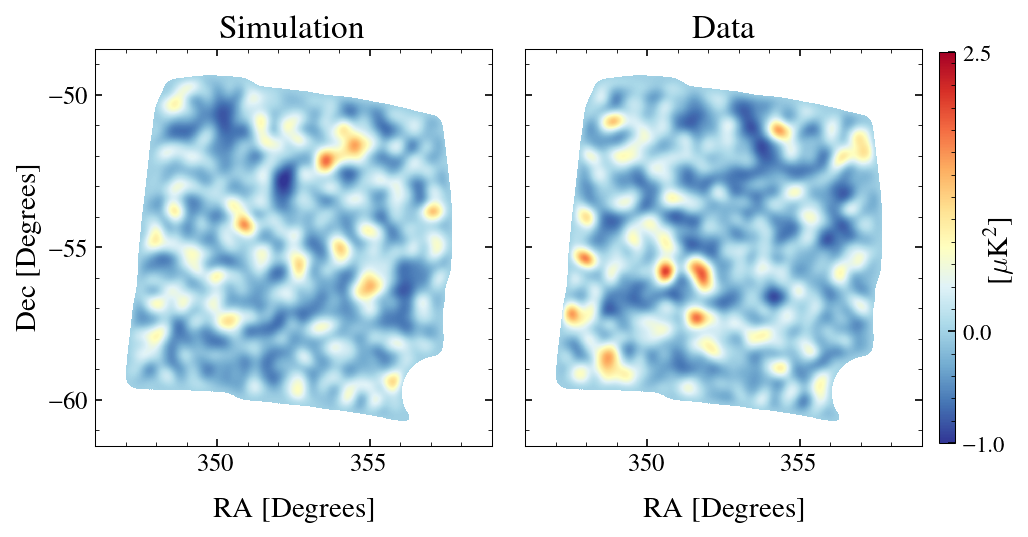

In [18]:

#some variables
filter_str = 'filterlmin3000.0-filterlmax3700.0'
parent_fd_pref = 'results/ksz_4pt/%s/xxx/flatsky/90-150-151-220-600-857/S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters/' %(filter_str)
map_comb_str = 'mv-mv-mv-mv'
fname_pref = '%s_%s' %(map_comb_str, filter_str)
total_sims = 250
reso_arcmin = 0.5
gauss_beam_fwhm_deg = 0.5
pl_dict = {}
pl_fd = 'plots/for_paper/'
if not os.path.exists( pl_fd ): os.system('mkdir -p %s' %(pl_fd))

########################################################################
########################################################################
#get mean-field
parent_fd_mf = parent_fd_pref.replace('xxx', 'data')
fname = '%s/covariance/big_K_power_spectra_%s_%ssims.npy' %(parent_fd_mf, map_comb_str, total_sims)
res_dict = np.load( fname, allow_pickle = True ).item()
pl_dict['mean_field'] = res_dict['big_k_m1_mean']
print(pl_dict['mean_field'].shape)

########################################################################
########################################################################
#get data
parent_fd_data = parent_fd_pref.replace('xxx', 'data')
data_fname = '%s/%s.npy' %(parent_fd_data, fname_pref)
res_dict = np.load( data_fname, allow_pickle = True ).item()
pl_dict['data'] = res_dict['big_K']['maps'][0] - pl_dict['mean_field']
print(pl_dict['data'].shape)

########################################################################
########################################################################
#get sims
parent_fd_sims = parent_fd_pref.replace('xxx', 'sims').replace('S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters', 'S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters_KK')
comp_arr = ['cib_cmb_rad_tsz_ksz_kszreion_noise', 'cmb', 'cib', 'tsz', 'ksz', 'rad', 'noise', 'kszreion']
pl_dict['sims'] = {}
for comp in comp_arr:
    if comp == 'cib_cmb_rad_tsz_ksz_kszreion_noise':
        curr_fd = '%s/%s/withexpbeamsandTF/' %(parent_fd_sims, comp)
    else:
        curr_fd = '%s/%s/withexpbeams/' %(parent_fd_sims, comp)
    fname = '%s/%s_sim0.npy' %(curr_fd, fname_pref)
    
    res_dict = np.load( fname, allow_pickle = True ).item()
    ##print(res_dict.keys())
    pl_dict['sims'][comp] = res_dict['big_K']['maps'][0] - pl_dict['mean_field']
    print( pl_dict['sims'][comp].shape )

########################################################################
########################################################################
#for smoothing
ny, nx = pl_dict['mean_field'].shape
mapparams = [ny, nx, reso_arcmin, reso_arcmin]        
bl_for_smoothing = H.gauss_beam(np.radians(gauss_beam_fwhm_deg), 10000)
bl_2D_for_smoothing = flatsky.cl_to_cl2d(np.arange(len(bl_for_smoothing)), bl_for_smoothing, mapparams)
########################################################################
########################################################################

#mask
which_proj = 0
mask, maskname_apodonly_spt, maskname_apodonly_spire = tools.get_mask_for_ps_calc(which_proj, apod_only = True, show_plot = False, use_combined_spt_spire_apod_mask = True)
#binary_apod_mask, maskname_apodonly_spt, maskname_apodonly_spire = tools.get_mask_for_ps_calc(which_proj, apod_only = True, binary_apod = True, show_plot = False)

########################################################################
########################################################################

#make plot

#plot specs
#cmap = py_ini.get_planck_cmap()
cmap = cm.RdYlBu_r
#cmap = cm.RdBu_r
boxsize_deg = 13.
boxsize_am = 13 * 60.
axmin, axmax = -boxsize_deg/2., boxsize_deg/2.
ra0, dec0 = 352.5, -55.
xmin, xmax = ra0+axmin, ra0+axmax
ymin, ymax = dec0+axmin, dec0+axmax
print(xmin, xmax)
print(ymin, ymax)

title_dict = {'mean_field': 'Mean-field', 'sims': 'Simulation', 'data': 'Data'}
sim_title_dict = {'noise': 'Noise', 'cib': 'CIB', 'rad': 'Radio', 'tsz': 'tSZ', 'ksz': 'kSZ', 'cmb': 'CMB', 'kszreion': 'kSZ-Reion'}

for pliter in range(1):

    clf()

    if pliter == 0:
        fsval = 14
        fig = figure(figsize=(10., 4.2))
        to_plot_keyname_arr = ['mean_field', 'sims', 'data']
        sim_comp_arr = ['cib_cmb_rad_tsz_ksz_kszreion_noise']
        tr, tc = 1, len(to_plot_keyname_arr)
        vmin, vmax = -1., 2.5
        plname = '%s/bigk_maps_data_vs_sims.pdf' %(pl_fd)
        
    elif pliter == 1:
        fsval = 12
        fig = figure(figsize=(12., 4.5))
        sim_comp_arr = ['kszreion', 'cmb', 'cib', 'noise', 'ksz', 'rad', 'tsz']
        to_plot_keyname_arr = np.tile('sims', len(sim_comp_arr))
        tr, tc = 1, len(sim_comp_arr)
        vmin, vmax = -0.5, 0.5
        plname = '%s/bigk_maps_sims.pdf' %(pl_fd)

    subplots_adjust(hspace = 0.1, wspace = 0.02)
    
    if (1):
        clf()
        ##fig = figure(figsize=(10., 4.2))
        fig = figure(figsize=(7.4, 3.5))
        to_plot_keyname_arr = ['sims', 'data']
        tr, tc = 1, 2
        subplots_adjust(hspace = 0.0, wspace = 0.0)    
        
    for to_plot_cntr, to_plot_keyname in enumerate( to_plot_keyname_arr ):
        if to_plot_keyname in ['mean_field', 'data']:
            curr_bigk_map = pl_dict[to_plot_keyname]
            title_val = title_dict[to_plot_keyname]
        else:
            if len(sim_comp_arr) == 1:
                curr_bigk_map = pl_dict[to_plot_keyname][sim_comp_arr[0]]
                title_val = title_dict[to_plot_keyname]
            else:
                curr_bigk_map = pl_dict[to_plot_keyname][sim_comp_arr[to_plot_cntr]]
                title_val = sim_title_dict[sim_comp_arr[to_plot_cntr]]
        
        #perform smoothing
        curr_bigk_map = np.fft.ifft2( np.fft.fft2(curr_bigk_map) * bl_2D_for_smoothing ).real
        curr_bigk_map = curr_bigk_map * mask
        masked_inds = np.where( mask <=0.4)
        curr_bigk_map[masked_inds] = None
        '''
        mask[mask == 0.] = None
        curr_bigk_map = curr_bigk_map * mask
        cmap.set_under('white')
        '''
        
        ax = subplot2grid( (tr, tc), (0, to_plot_cntr))
        tmp_imshow = imshow(curr_bigk_map, extent = [xmin, xmax, ymin, ymax], cmap = cmap, vmin = vmin, vmax = vmax);
        
        title(r'%s' %(title_val), fontsize = fsval+2)
        ax = format_axis(ax,fsval-2,fsval-2,maxxloc=3)
        #ax.xaxis.set_major_locator(plt.MaxNLocator(3)); ax.yaxis.set_major_locator(plt.MaxNLocator(3))
        if pliter == 0:
            xlabel(r'RA [Degrees]', fontsize = fsval, labelpad = 10.)
        else:
            if to_plot_cntr == 3:
                xlabel(r'Dec [Degrees]', fontsize = fsval + 2, labelpad = 10.)
            #setp(ax.get_xticklabels(), visible=False)
        if to_plot_cntr == 0:
            ylabel(r'Dec [Degrees]', fontsize = fsval)
        else:
            setp(ax.get_yticklabels(), visible=False)
        
        ##colorbar()        
        ##axis('off')
    if pliter == 0: #include colour bar
        if (0): #horizontal
            xloc, yloc = 0.25, 0.0 #0.05
            w, h = 0.5, 0.05
            orientation_val = 'horizontal'
            labelpad = None
        else:
            xloc, yloc = 0.91, 0.2 #0.05
            w, h = 0.01, 0.605
            orientation_val = 'vertical'
            labelpad = -10
            
        if (1):
            xloc, yloc = 0.9, 0.13 #0.05
            w, h = 0.015, 0.745
            orientation_val = 'vertical'
            labelpad = -10

        cax = fig.add_axes([xloc, yloc, w, h])
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar = mpl.colorbar.ColorbarBase(cax, norm = norm, ticks = [vmin, 0., vmax], cmap=cmap, orientation=orientation_val)#, format = r'\textbf{$%g$}')#, drawedges = 0.)
        cbar.set_label('[$\mu$K$^{2}$]', fontsize = fsval, labelpad = labelpad)
        cbar.ax.tick_params(labelsize=fsval-3)#, pad = -3)
        #cbar.ax.tick_params(which = 'minor', right = 'off')

    ##savefig(plname, dpi = 200.)
    print(plname)
    show()

# Plot 2 - 4-pt for different components

results/ksz_4pt/filterlmin3000.0-filterlmax3500.0/sims/flatsky/90-150-151-220-600-857/S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters_KK/multiple_patches_100/
Component = cmb; Total sims = 25
Component = rad; Total sims = 25
Component = ksz; Total sims = 25
Component = noise; Total sims = 25
Component = cib; Total sims = 25
Component = tsz; Total sims = 25
Component = cib_tsz; Total sims = 25
Component = kszreion; Total sims = 25
dict_keys(['cmb', 'rad', 'ksz', 'noise', 'cib', 'tsz', 'cib_tsz', 'kszreion'])
cmb
rad
ksz
noise
cib
tsz
cib_tsz
kszreion


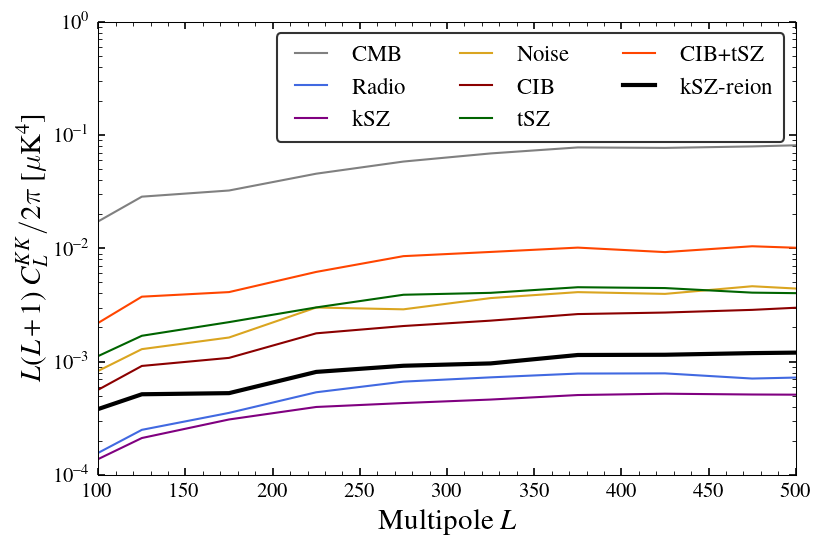

SystemExit: 

/cvmfs/spt.opensciencegrid.org/py3-v4/RHEL_7_x86_64/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [43]:
if (1): #20231110 - 4-pt kSZ vs others for different \ell range cuts for the two maps
    import ksz_4pt_tools
    import re
    comp_dic = {'cmb': ['CMB', 'gray', 1.], 
                'rad': ['Radio', 'royalblue', 1.], 
                'ksz': ['kSZ', 'purple', 1.], 
                'noise': ['Noise', 'goldenrod', 1.], 
                'cib': ['CIB', 'darkred', 1.], 
                'tsz': ['tSZ', 'darkgreen', 1.], 
                'cib_tsz': ['CIB+tSZ', 'orangered', 1.], 
                'kszreion': ['kSZ-reion', 'black', 2.], 
               }

    Lmin_for_fitting, Lmax_for_fitting = 10., 550.
    add_new_mask_for_big_K = False
    ilc_keyname = 'mv'
    sim_index_to_remove = -1
    lmin_lmax_filterval = 'filterlmin3000.0-filterlmax3500.0'
    ##lmin_lmax_filterval = 'filterlmin3000.0-filterlmax3700.0'
    fd = 'results/ksz_4pt/%s/sims/flatsky/90-150-151-220-600-857/S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters_KK/multiple_patches_100/' %(lmin_lmax_filterval)
    print(fd)

    '''
    #currently turning this off as the 4-pt estimates from sims have mean-field in them.
    #so always leaving mean-field on for N0 calulcation.
    use_mean_field_subtracted_estimate = False #change me
    '''

    #simulations
    binned_el, pl_spec_dic = ksz_4pt_tools.get_4pt_results_for_plotting(fd, lmin_lmax_filterval, comp_dic, add_new_mask_for_big_K = add_new_mask_for_big_K, sim_index_to_remove = sim_index_to_remove, ilc_keyname = ilc_keyname, Lmin = Lmin_for_fitting, Lmax = Lmax_for_fitting, quiet = False)
    print(pl_spec_dic.keys()); ##sys.exit()

    #make plot now
    if (1): #def make_4pt_plot(pl_spec_dic):
        fsval = 14
        dlfac_str = 'elsq'
        #dlfac_str = 'el'
        if dlfac_str == 'elsq':
            yscaleval = 'log'
            ylabval = r'$L(L+1)\ C_{L}^{KK}/2\pi$ [$\mu$K$^{4}$]'
            ymin, ymax = 1e-4, 1.
        elif dlfac_str == 'el':
            yscaleval = None
            ymin, ymax = -1e-3, 1e-3
            ylabval = r'$L C_{L}^{KK}$ [$\mu$K$^{4}$]'
        clf()
        ax = subplot(111, yscale = yscaleval)
        for comp in pl_spec_dic:            
            print(comp)

            binned_el = pl_spec_dic[comp]['binned_el']
            binned_cl_mean = pl_spec_dic[comp]['binned_cl_mean']
            if dlfac_str == 'elsq':
                dl_fac = binned_el * (binned_el+1)/2/np.pi
            elif dlfac_str == 'el':
                dl_fac = binned_el
            
            labval, colorval, lwval = comp_dic[comp]
            plot(binned_el, dl_fac * binned_cl_mean, color = colorval, lw = lwval, label = r'%s' %(labval))
        
    
        xlabel(r'Multipole $L$', fontsize = fsval)
        ylabel(ylabval, fontsize = fsval)
        xlim(100., 500.); ylim(ymin, ymax)
        legend(loc = 'best', fontsize = fsval-3, ncol = 3)
        show()


    sys.exit()


In [542]:
spt3g_folder = '/sptlocal/user/sri/spt3g/spt3g_software/'
datafolder = '%s/simulations/python/data/' %(spt3g_folder)
cambfolder = 'camb/planck18_TTEEEE_lowl_lowE_lensing_highacc' #'camb/planck18_TTEEEE_lowl_lowE_lensing'
builddir = '%sbuild' %(spt3g_folder)
sys.path.append(builddir)
ilcdir = '%s/ilc/python' %(spt3g_folder)
sys.path.append(ilcdir)

from spt3g import core
from spt3g.mapspectra import map_analysis
from spt3g import maps

sys.path.append('../')
import tools
import flatsky

import ksz_4pt_tools

In [13]:
#map specs
'''
ra0_reqd, dec0_reqd = 352.5, -55.0
boxsize_deg = 13.0
'''
which_proj = 0 ##5
reso_arcmin = 0.5
reso_rad = np.radians(reso_arcmin/60.)
ny, nx = 1560, 1560
lmax = 15000
nside = 2048 ###4096 ##2048
nside_ip_maps = 4096 ##2048
use_notch_filter = 0 ##1 ##0
replace_mv_with_150 = 0 ##1

##nside_bigK = 1024
binsize = 50
lmax_bigK = 1000

#SPTpol 150
include_sptpol_150 = False ##True

#inpainting options
inpainted = True
if inpainted:
    apod_only_mask = True
    correct_for_mode_coupling = False
else:
    apod_only_mask = False
    correct_for_mode_coupling = True

#source masking
source_threshold_mjy = 2.0 ##2.0 ##4.0 ##4.0 ##2.0 ##4.0 ##3.0 ##2.0 ##3.0 ##4.0
clusters_threshold_snr = 5.0
source_cluster_thresh_str = 'S150%.1fmJy_clusterSNR%.1f' %(source_threshold_mjy, clusters_threshold_snr)

use_megadeep_cluster_list = False 
if (1): #20230905 - include SPT megadeep cluster catalogue
    flux_thresh_mJy = 2.0
    clusters_threshold_snr = 4.5 ##1000.0 #20.0 #10.0 #6.0 #4.5 ##6.0 ##15.0 #8.0 ##7.0 ##20. ##10.0 ##4.5 ##1000.0 ###20.0 ##10.0 ##4.5 ##10.0 ##4.5 ##10.0 ##4.5 ##5.0
    use_megadeep_cluster_list = True
    ###source_flist_fname = 'mapmaking/3G/data/products/sources/spt3g_winterplusedgesources_clusters_S150%.1fmJy_clusterSNR%.1f_withfluxes_withspt100dmegadeepclusters.txt' %(source_threshold, cluster_snr_threshold)
    source_cluster_thresh_str = 'S150%.1fmJy_clusterSNR%.1f_withspt100dmegadeepclusters' %(source_threshold_mjy, clusters_threshold_snr)

print(source_cluster_thresh_str)

#ILC maps or ind band maps
use_ilc_maps = True
ignore_herschel_data = False ##True

#filter stuff
remove_mean = True
lmin_for_filter = 3000. #3300.
lmax_for_filter = 4300. #4100. ##4300.


#bands and maps
###b1, b2, b3, b4 = 90, 90, 150, 150
###b1, b2, b3, b4 = 150, 150, 150, 150
b1, b2, b3, b4 = 'mv', 'mv', 'mv', 'mv'
#b1, b2, b3, b4 = 'mv_noisereduced0.8', 'mv_noisereduced0.8', 'mv_noisereduced0.8', 'mv_noisereduced0.8'
#b1, b2, b3, b4 = 'mv_noisereduced0.5', 'mv_noisereduced0.5', 'mv_noisereduced0.5', 'mv_noisereduced0.5'
#b1, b2, b3, b4 = 'mv_noisereduced0.1', 'mv_noisereduced0.1', 'mv_noisereduced0.1', 'mv_noisereduced0.1'

map_combinations_for_4pt = [b1, b2, b3, b4]
map_combinations_for_4pt_str = '-'.join(map_combinations_for_4pt)

map_fd = '../data/products/ilc/noise_jk_100/mdpl2//%s/' %(source_cluster_thresh_str)
print( map_fd )

lmin, lmax, delta_l = 2000, 7000, 50
tf_eff_plus_beam = None

#20231003 - add a circular mask or no
add_new_mask_for_big_K = True #False #True #False

#data or simulations
switch_to_sims = False ##True #False ##True
use_kayla_list = True #False ##True
mdpl2_comp_arr_str = None
save_bigK_maps = True

if switch_to_sims:
    if (1): #100d centre on sims
        #mdpl2_comp_arr_str = 'cib_cmb_rad_tsz_ksz_noise'
        mdpl2_comp_arr_str = 'cib_cmb_rad_tsz_ksz_kszreion_noise'
        sim_index = 0
        sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside8192/g3/sim0/%s/withexpbeamsandTF/ilc/' %(mdpl2_comp_arr_str)
        
    if (0): #20231019 - 100d centre on sims - Takahashi tSZ
        mdpl2_comp_arr_str = 'cib_cmb_rad_tsztakahashi_noise'
        sim_index = 0
        sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside8192/g3/takahashi_tsz/sim0/%s/withexpbeamsandTF/ilc/' %(mdpl2_comp_arr_str)
        use_kayla_list = False
        
        
    if (0): #AMBER stuff - 100d centre
        #amber_fd_pref_boxsize_zranges_nside_spec_name = 'Nm1d512_box1000_ionfrac0.05-0.95_z5-20-0.2_nside8192' #20231004
        amber_fd_pref_boxsize_zranges_nside_spec_name = 'Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192' #20231012
        mdpl2_comp_arr_str = None
        
        '''
        sim_index = 0
        #sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside2048/g3/AMBER/withexpbeamsandTF/seed0/zre8_Dz4_Az3_M1e+08_lamb3//ilc/'
        #sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside2048/g3/AMBER/withexpbeams/seed0/zre8_Dz4_Az3_M1e+08_lamb3//ilc/'
        #sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside2048/g3/AMBER/noexpbeamsnoTF/seed0/zre8_Dz4_Az3_M1e+08_lamb3//ilc/'

        #sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside8192/g3/AMBER/withexpbeamsandTF/seed0/zre8_Dz4_Az3_M1e+08_lamb3//ilc/'
        sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside8192/g3/AMBER/noexpbeamsnoTF/seed0/zre8_Dz4_Az3_M1e+08_lamb3//ilc/'
        '''

        '''
        sim_index = 1
        sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside8192/g3/AMBER/withexpbeamsandTF/seed1/zre8_Dz4_Az3_M1e+08_lamb3_nside8192//ilc/'
        '''
        sim_index = 0
        ##amber_spec_name = 'zre12_Dz12_Az3_M1e+08_lamb3'
        amber_spec_name = 'zre8_Dz4_Az3_M1e+08_lamb3'
        sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside8192/g3/AMBER/%s/withexpbeamsandTF/seed%s/%s//ilc/' %(amber_fd_pref_boxsize_zranges_nside_spec_name, sim_index, amber_spec_name)
        
    if (0): #multiple patches
        #mdpl2_comp_arr_str = 'cmb'
        #mdpl2_comp_arr_str = 'rad'
        #mdpl2_comp_arr_str = 'cib_tsz'
        #mdpl2_comp_arr_str = 'cib'
        #mdpl2_comp_arr_str = 'cib_tsz_noise'
        #mdpl2_comp_arr_str = 'cib_cmb_rad_tsz_ksz_noise'
        #mdpl2_comp_arr_str = 'cib_rad_tsz_ksz_noise_uncorrcmb'
        #mdpl2_comp_arr_str = 'cib_tsz_noise_gaucmb_gaurad'
        
        ##mdpl2_comp_arr_str = 'cib_cmb_rad_tsz_noise'
        ##mdpl2_comp_arr_str = 'cib_cmb_rad_tszx0.8_noise'
        ##mdpl2_comp_arr_str = 'cib_cmb_rad_tszx0.9_noise'
        ##mdpl2_comp_arr_str = 'cib_cmb_rad_tszx1.1_noise'
        ##mdpl2_comp_arr_str = 'cib_cmb_rad_tszx1.2_noise'
        mdpl2_comp_arr_str = 'cib_cmb_rad_tszx2.0_noise'
        
        sim_index = 0 ##5 ##20 ##0 ##1 ##1 ## ##1 ##0 ##2 ##1
        sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside8192/g3/multiple_patches_25/sim%s/%s/withexpbeamsandTF/ilc/' %(sim_index, mdpl2_comp_arr_str)
        
    if (0): #for paper - bigK plots; no TF; only has beams
        number_of_patches = 25 ###100 ##25
        mdpl2_comp_arr_str = 'cmb'
        #mdpl2_comp_arr_str = 'rad'
        #mdpl2_comp_arr_str = 'ksz'
        #mdpl2_comp_arr_str = 'kszreion'
        #mdpl2_comp_arr_str = 'noise'
        #mdpl2_comp_arr_str = 'cib'
        mdpl2_comp_arr_str = 'tsz'
        sim_index = 0
        sim_fd_pref = '/home/sri/analysis/2020_07/ksz_ps/sims/mdpl2/data/v0.7/bahamas80_scal1.000/flatsky/maps_nside8192/g3/multiple_patches_%s/sim%s/%s/withexpbeamsandTF/ilc/' %(number_of_patches, sim_index, mdpl2_comp_arr_str)
        print(sim_fd_pref); ##sys.exit()
    
    if (0):###sim_fd_pref.find('multiple_patches_25')>-1:
        save_bigK_maps = False
    else:
        save_bigK_maps = True

    if mdpl2_comp_arr_str == 'cib_tsz_rad_noise_gaucmb': #20231013 - save maps for kappa xcorr.
        save_bigK_maps = True
        
    if use_kayla_list:
        source_cluster_thresh_str = '%s_KK' %(source_cluster_thresh_str)
    

lmax_str_val = 'filterlmin%s-filterlmax%s' %(lmin_for_filter, lmax_for_filter)
if use_notch_filter:
    lmax_str_val = '%s_notchfilter' %(lmax_str_val)
op_folder_pref = 'results/ksz_4pt/%s/' %(lmax_str_val)
print('\nOutput folder prefix = %s\n' %(op_folder_pref))


show_plot = True
    

S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters
../data/products/ilc/noise_jk_100/mdpl2//S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters/

Output folder prefix = results/ksz_4pt/filterlmin3000.0-filterlmax4300.0/



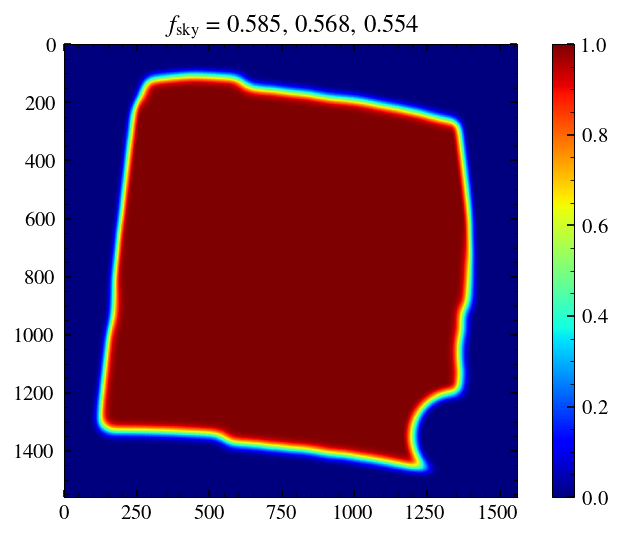

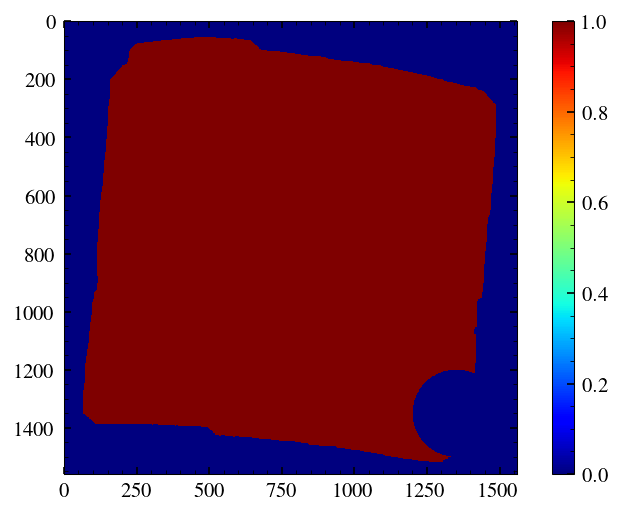

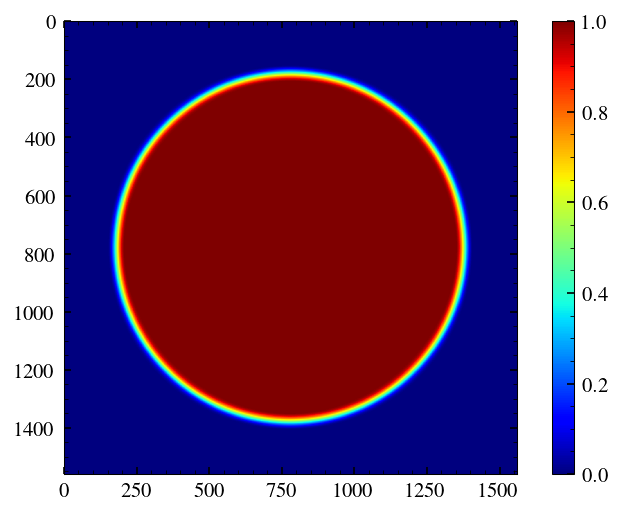

In [14]:
#mask
mask, maskname_apodonly_spt, maskname_apodonly_spire = tools.get_mask_for_ps_calc(which_proj, source_cluster_thresh_str = source_cluster_thresh_str, apod_only = True, show_plot = False, use_combined_spt_spire_apod_mask = True)
binary_apod_mask, maskname_apodonly_spt, maskname_apodonly_spire = tools.get_mask_for_ps_calc(which_proj, source_cluster_thresh_str = source_cluster_thresh_str, apod_only = True, binary_apod = True, show_plot = False)
if show_plot:
    fsky = np.mean( mask )
    fsky_w2 = np.mean( mask**2. )
    fsky_w4 = np.mean( mask**4. )
    imshow(mask); colorbar(); title(r'$f_{\rm sky}$ = %.3f, %.3f, %.3f' %(fsky, fsky_w2, fsky_w4)); show()
    imshow(binary_apod_mask); colorbar(); show()
mask_ori = np.copy(mask)
binary_apod_mask_ori = np.copy(binary_apod_mask)

mask_circular = ksz_4pt_tools.get_circular_mask(mask, angres_am = reso_arcmin, circular_mask_deg = 5.)
imshow(mask_circular); colorbar(); show()

results/ksz_4pt/filterlmin3000.0-filterlmax4300.0//data/flatsky/90-150-151-220-600-857/S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters//mv-mv-mv-mv_filterlmin3000.0-filterlmax4300.0.npy

get map frames
dict_keys(['full', 'half1', 'half2'])


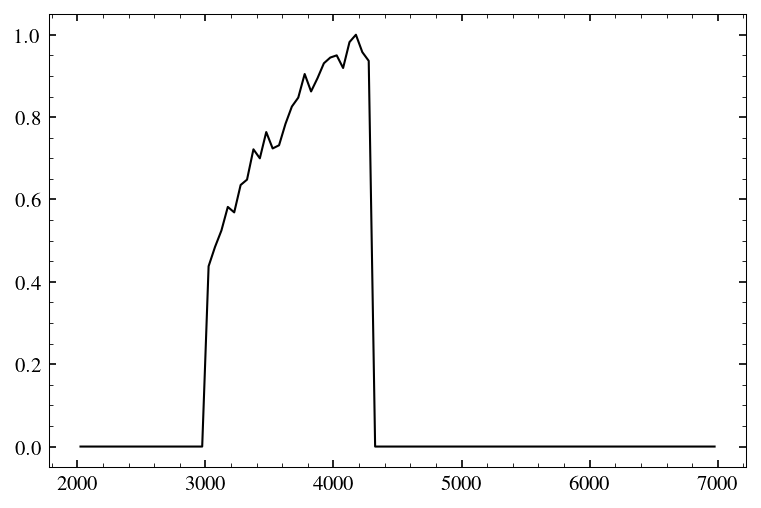

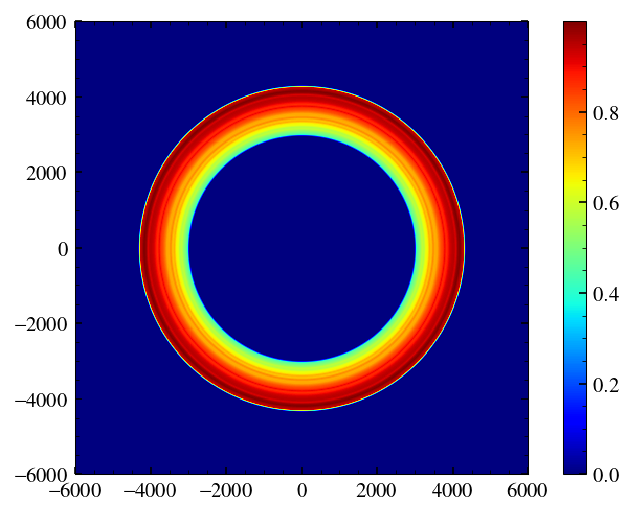

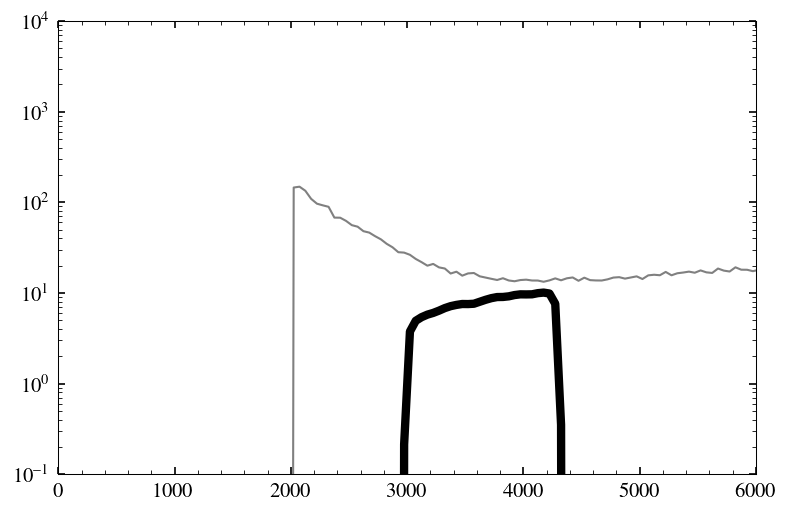

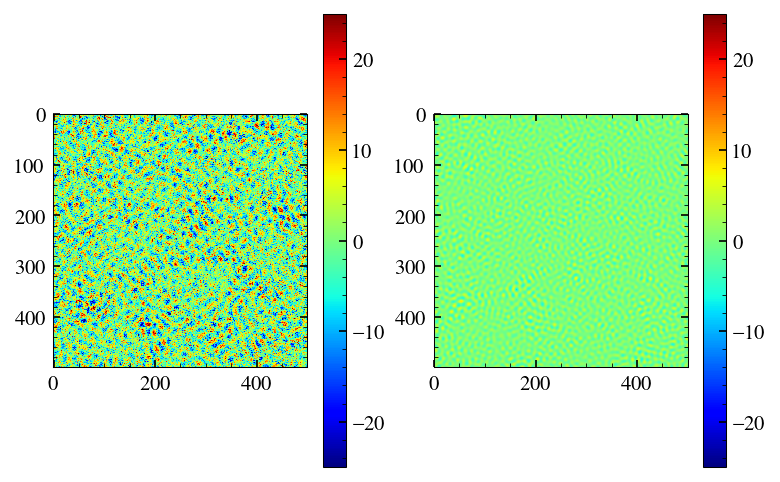

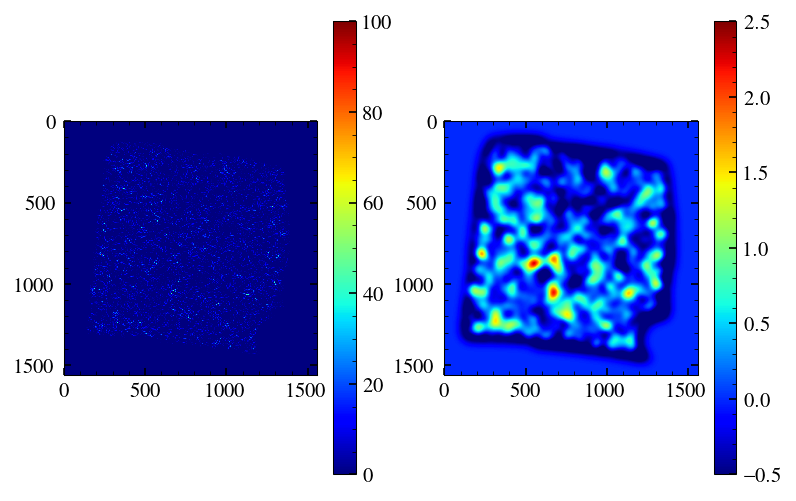

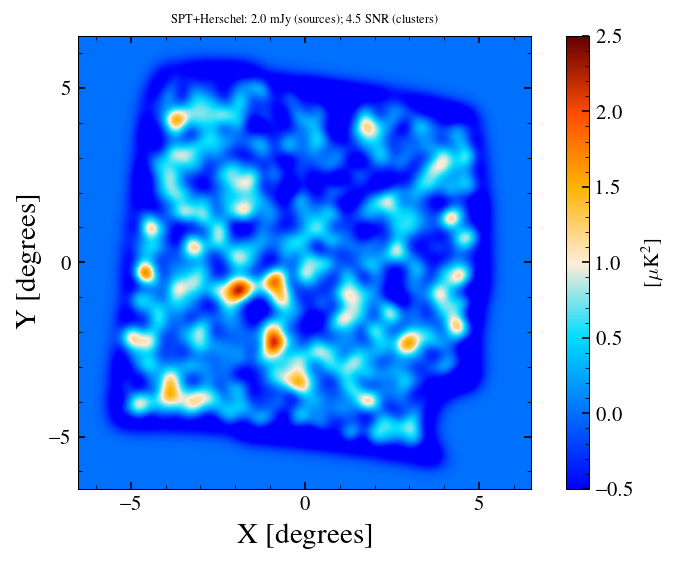

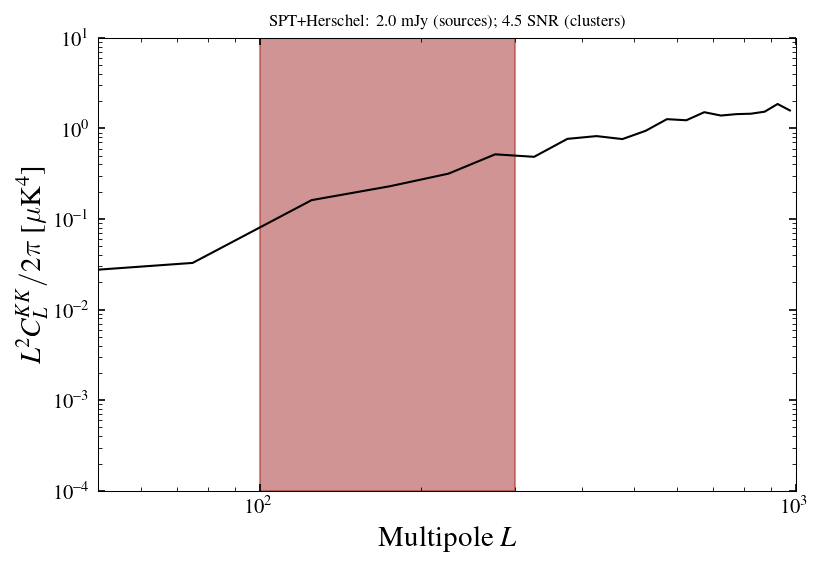


 results/ksz_4pt/filterlmin3000.0-filterlmax4300.0//data/flatsky/90-150-151-220-600-857/S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters//mv-mv-mv-mv_filterlmin3000.0-filterlmax4300.0.npy 

Done.


In [8]:
import copy

#binsize = 50
ny, nx = mask.shape
mapparams = [ny, nx, reso_arcmin, reso_arcmin]        
gauss_beam_fwhm_deg = 0.5
bl_for_smoothing = H.gauss_beam(np.radians(gauss_beam_fwhm_deg), 10000)
bl_2D_for_smoothing = flatsky.cl_to_cl2d(np.arange(len(bl_for_smoothing)), bl_for_smoothing, mapparams)
add_new_mask_for_big_K = False

##res_dic = {}
debug = True ##False ##True
pl_dic = {}
for iter in range(2):

    res_dic = {}
    fullset_mapname_dic = {}
    if b1 in ['mv', 'mv_noisereduced0.8', 'mv_noisereduced0.5', 'mv_noisereduced0.1'] and b1 == b2 and b1 == b3 and b1 == b4:
        if iter == 0:
            band_arr = ['90GHz', '150GHz', '151GHz', '220GHz', '600GHz', '857GHz']
            expband_arr = ['spt3g_90', 'spt3g_150', 'sptpol_150', 'spt3g_220', 'spire_600', 'spire_857']

            datasets = 'SPT+Herschel'
            fullset_mapname_dic['full'] = 'data/products/ilc/noise_jk_100/mdpl2//%s/90-150-150-220-600-857//2D_ilc/cmb//cmb%s_full_proj%s.g3' %(source_cluster_thresh_str, b1, which_proj)
            fullset_mapname_dic['half1'] = 'data/products/ilc/noise_jk_100/mdpl2//%s/90-150-150-220-600-857//2D_ilc/cmb//cmb%s_half1_proj%s.g3' %(source_cluster_thresh_str, b1, which_proj)
            fullset_mapname_dic['half2'] = 'data/products/ilc/noise_jk_100/mdpl2//%s/90-150-150-220-600-857/2D_ilc/cmb//cmb%s_half2_proj%s.g3' %(source_cluster_thresh_str, b1, which_proj)
            reqd_keyname = 'full'
            
        else:

            band_arr = ['90GHz', '150GHz', '151GHz', '220GHz']
            expband_arr = ['spt3g_90', 'spt3g_150', 'sptpol_150', 'spt3g_220']

            datasets = 'SPT'
            fullset_mapname_dic['spt_full'] = 'data/products/ilc/noise_jk_100/mdpl2//%s//90-150-150-220//2D_ilc//cmb//cmb%s_full_proj%s.g3' %(source_cluster_thresh_str, b1, which_proj)
            fullset_mapname_dic['spt_half1'] = 'data/products/ilc/noise_jk_100/mdpl2//%s//90-150-150-220//2D_ilc//cmb//cmb%s_half1_proj%s.g3' %(source_cluster_thresh_str, b1, which_proj)
            fullset_mapname_dic['spt_half2'] = 'data/products/ilc/noise_jk_100/mdpl2//%s//90-150-150-220//2D_ilc//cmb//cmb%s_half2_proj%s.g3' %(source_cluster_thresh_str, b1, which_proj) 
            reqd_keyname = 'spt_full'
            
        if switch_to_sims:
            if iter == 0:
                if use_kayla_list:
                    datasets = 'SPT+Herschel: Sims (KK clusters)'
                else:
                    datasets = 'SPT+Herschel: Sims'
                fullset_mapname_dic['full'] = '%s/%s/90-150-150-220-600-857//2D_ilc/cmb//cmb%s_full_proj%s.g3' %(sim_fd_pref, source_cluster_thresh_str, b1, which_proj)
                if replace_mv_with_150:
                    fullset_mapname_dic['full'] = '%s/mdpl2_150GHz.g3' %(sim_fd_pref.replace('ilc/', ''))
                fullset_mapname_dic['half1'] = fullset_mapname_dic['full']
                fullset_mapname_dic['half2'] = fullset_mapname_dic['full']
                ###print(fullset_mapname_dic); sys.exit()
            else:
                continue

    nuarr = [int(nu.replace('GHz', '')) for nu in band_arr]
    nbands = len(band_arr)
    nuarr_str_val = '-'.join( [str(nu) for nu in nuarr] )
    ##print(nuarr_str_val); ##sys.ext()
    
    ###print(fullset_mapname_dic); ##sys.exit()
            
    ##########################################################################################
    ##########################################################################################
    if not switch_to_sims:
        opfolder = '%s/data/flatsky/%s/%s/' %(op_folder_pref, nuarr_str_val, source_cluster_thresh_str)
        opfname = '%s/%s_%s' %(opfolder, map_combinations_for_4pt_str, lmax_str_val)
    else:
        if mdpl2_comp_arr_str is not None: #MDPL2
            if sim_fd_pref.find('multiple_patches_')>-1:
                opfolder = '%s/sims/flatsky/%s/%s/multiple_patches_%s/%s/' %(op_folder_pref, nuarr_str_val, source_cluster_thresh_str, number_of_patches, mdpl2_comp_arr_str)
            else:
                opfolder = '%s/sims/flatsky/%s/%s/%s/' %(op_folder_pref, nuarr_str_val, source_cluster_thresh_str, mdpl2_comp_arr_str)
        else:
            ##amber_spec_name = sim_fd_pref.replace('//', '/').strip('/').split('/')[-2]
            opfolder = '%s/sims/flatsky/%s/%s/AMBER/%s/%s/' %(op_folder_pref, nuarr_str_val, source_cluster_thresh_str, amber_fd_pref_boxsize_zranges_nside_spec_name, amber_spec_name)
            
        if sim_fd_pref.find('withexpbeamsandTF')>-1:
            opfolder = '%s/withexpbeamsandTF/' %(opfolder)
        elif sim_fd_pref.find('withexpbeams')>-1:
            opfolder = '%s/withexpbeams/' %(opfolder)
            
        opfname = '%s/%s_%s_sim%s' %(opfolder, map_combinations_for_4pt_str, lmax_str_val, sim_index)
        
    if replace_mv_with_150:
        opfname = opfname.replace(map_combinations_for_4pt_str, '150-150-150-150')
        

    if add_new_mask_for_big_K:
        opfname = '%s_withcircularmask.npy' %(opfname)
    else:
        opfname = '%s.npy' %(opfname)
    if not os.path.exists( opfolder ): os.system('mkdir -p %s' %(opfolder))
        
    print(opfname); ##sys.exit()

    if (0):##os.path.exists(opfname):
        print('\nalready done. check %s\n' %(opfname))
        continue
    ##########################################################################################
    ##########################################################################################

    #get map frames
    remove_weights = True
    print('\nget map frames')
    tmp_map_dic = {}
    for keyname in fullset_mapname_dic:
        ###print( fullset_mapname_dic[keyname] ); sys.exit()
        coadded_map = tools.read_map_frame_simple(fullset_mapname_dic[keyname])
        if remove_weights:
            maps.RemoveWeights(coadded_map, zero_nans = True)
        if (0):
            dummy = np.asarray(coadded_map['T']) / mask
            dummy[np.isnan(dummy)] = 0.
            dummy[np.isinf(dummy)] = 0.                        
            np.asarray(coadded_map['T'])[:] = dummy
        np.asarray(coadded_map['T'])
        np.asarray(coadded_map['T'])[:] = np.asarray(coadded_map['T']) * 1e3 #uK units
        tmp_map_dic[keyname] = coadded_map
    print(tmp_map_dic.keys())

    ##########################################################################################
    ##########################################################################################
    #get Wiener filters
    lx, ly = flatsky.get_lxly(mapparams)
    if not switch_to_sims: #20230929 - for sims, simply use the data-based Wiener filter
        m1 = tmp_map_dic[reqd_keyname]
        binned_cl1, binned_el = tools.wrapper_compute_psd(m1, reso_rad, map2=m1, return_2d = False, apod_mask = mask, delta_l = delta_l, lmin = lmin, lmax = lmax, tf_2d = tf_eff_plus_beam, get_ellbin_centres = True)

        cl_ksz = ksz_4pt_tools.get_ksz_power_for_filtering(binned_el)
        w1, w1_2D = ksz_4pt_tools.get_filter(binned_el, cl_signal = cl_ksz, cl_noise = binned_cl1, lmin_for_filter = lmin_for_filter, lmax_for_filter = lmax_for_filter, mapparams = mapparams)    
    else:
        if not use_notch_filter:
            print('\tpick Wiener filter from data')
            ##actual_data_result_fname = 'results/ksz_4pt/data/flatsky/S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters/%s_%s.npy' %( map_combinations_for_4pt_str, lmax_str_val )
            actual_data_result_fname = '%s/data/flatsky/%s/S1502.0mJy_clusterSNR4.5_withspt100dmegadeepclusters/%s_%s_withcircularmask.npy' %( op_folder_pref, nuarr_str_val, map_combinations_for_4pt_str, lmax_str_val )
            actual_data_result_dic = np.load(actual_data_result_fname, allow_pickle = True).item()
            ###print(actual_data_result_dic.keys()); sys.exit()

            if (1):##map_combinations_for_4pt_str == 'mv-mv-mv-mv':
                binned_el = actual_data_result_dic['binned_el']
                binned_wls = actual_data_result_dic['filters']['wl'][0]
                #tmpwl = np.interp(np.arange(10000), binned_els, binned_wls, right = 0.)
                #wl = np.interp(els, np.arange(10000), tmpwl, right = 0.)
                ##wl = np.interp(els, binned_els, binned_wls, right = 0.)
                wl = binned_wls
                wl_2D = actual_data_result_dic['filters']['wl_2D'][0]
                wiener_filter_dic = {}
                for mapkey in map_combinations_for_4pt:
                    wiener_filter_dic[mapkey] = [wl, wl_2D]
            ##print(wiener_filter_dic.keys()); sys.exit()
            w1, w1_2D = wiener_filter_dic[b1]
        else: #20231014 - simple notch filter in the given \ell ranges.
            m1 = tmp_map_dic[reqd_keyname]
            binned_cl1, binned_el = tools.wrapper_compute_psd(m1, reso_rad, map2=m1, return_2d = False, apod_mask = mask, delta_l = delta_l, lmin = lmin, lmax = lmax, tf_2d = tf_eff_plus_beam, get_ellbin_centres = True)
            w1, w1_2D = ksz_4pt_tools.get_filter(binned_el, lmin_for_filter = lmin_for_filter, lmax_for_filter = lmax_for_filter, mapparams = mapparams)    

        

    '''
    if mdpl2_comp_arr_str is None:
        w1, w1_2D = ksz_4pt_tools.get_filter(binned_el, lmin_for_filter = lmin_for_filter, lmax_for_filter = lmax_for_filter, mapparams = mapparams)    
    '''        
        
    if debug:
        clf(); plot(binned_el, w1); show()
        clf(); imshow(np.fft.fftshift(w1_2D), extent = [np.min(lx), np.max(lx), np.min(ly), np.max(ly)] ); colorbar(); 
        xlim(-6000., 6000.); ylim(-6000., 6000.)
        show(); ###sys.exit()

    ##########################################################################################
    ##########################################################################################

    #filter maps
    tmp_map_dic_filtered = {}
    for keyname in tmp_map_dic:
        tmp_map_dic_filtered[keyname] = map_analysis.filterMap(tmp_map_dic[keyname], w1_2D, apod_mask=mask)

    m1_unfiltered_tmp = np.asarray(tmp_map_dic[reqd_keyname]['T'])
    m1_tmp = np.asarray(tmp_map_dic_filtered[reqd_keyname]['T'])

    #get power spectrum
    el_, cl_m1_unfiltered = flatsky.map2cl(mapparams, m1_unfiltered_tmp, binsize = binsize, maxbin = lmax, mask = mask)
    el_, cl_m1 = flatsky.map2cl(mapparams, m1_tmp, binsize = binsize, maxbin = lmax, mask = mask)
    
    if debug:
        ax = subplot(111, yscale='log')
        dl_fac = el_ * (el_+1)/2/np.pi
        plot(el_, dl_fac * cl_m1_unfiltered, color = 'gray')
        plot(el_, dl_fac * cl_m1, color = 'black', lw = 4.)
        ###plot(el_, dl_fac * cl_m1_gauss, color = 'lime')
        xlim(0., 6000.); ylim(0.1, 1e4)
        show(); ##sys.exit()

    ##########################################################################################
    ##########################################################################################

    m1_frame = tmp_map_dic_filtered[reqd_keyname]
    if debug:
        m1_frame_unfiltered = tmp_map_dic[reqd_keyname]
        clf()
        pl1 = np.asarray( m1_frame_unfiltered['T'] ) * mask
        pl2 = np.asarray( m1_frame['T'] ) * mask
        subplot(121); imshow( pl1[500:1000, 500:1000], vmin = -25, vmax =25. ); colorbar(); 
        subplot(122); imshow( pl2[500:1000, 500:1000], vmin = -25, vmax =25. ); colorbar(); 
        show(); ##sys.exit()

    #mapframe to array
    m1 = np.asarray(m1_frame['T'])## * mask
    
    #get bigK and power spectrum
    ###imshow(mask); colorbar(); show(); sys.exit()
    big_k_m1, mask_mod, el_, cl_big_k_m1 = ksz_4pt_tools.get_4pt_flatsky(m1, smap2 = m1, mask = mask, angres_am = reso_arcmin, add_new_mask_for_big_K = add_new_mask_for_big_K)        
    ##########################################################################################
    ##########################################################################################

    #smoothed with Gaussian beam
    big_k_m1_smoothed = np.fft.ifft2( np.fft.fft2(big_k_m1) * bl_2D_for_smoothing).real
        
    if debug:
        subplot(121); imshow( big_k_m1, vmin = 0, vmax =100.); colorbar(); 
        subplot(122); imshow( big_k_m1_smoothed, vmin = -0.5, vmax = 2.5); colorbar(); 
        show()

    if show_plot:
        import py_ini
        cmap = py_ini.get_planck_cmap()
        clf()
        boxsize_deg = 13.
        boxsize_am = 13 * 60.
        xmin, xmax = -boxsize_am/2., boxsize_am/2.
        xmin, xmax = xmin/60., xmax/60.
        ax = subplot(111)
        ##vmin_smoothed, vmax_smoothed = -0.5, 0.5 #2.5
        vmin_smoothed, vmax_smoothed = -0.5, 2.5
        ###vmin_smoothed, vmax_smoothed = None, None
        ###if mdpl2_comp_arr_str is None: vmin_smoothed, vmax_smoothed = None, None
        
        imshow(big_k_m1_smoothed, extent = [xmin, xmax, xmin, xmax], cmap = cmap, vmin = vmin_smoothed, vmax = vmax_smoothed); 
        ##cbar=colorbar(orientation = 'horizontal')#, ticks = [vmin_smoothed, 0., vmax_smoothed])
        cbar=colorbar(orientation = 'vertical')#, ticks = [vmin_smoothed, 0., vmax_smoothed])
        cbar.set_label('[$\mu$K$^{2}$]')
        masking_str = r'%s mJy (sources); %s SNR (clusters)' %(source_threshold_mjy, clusters_threshold_snr)
        ##tit_str = r'%s: Final; %s' %(datasets, masking_str)
        tit_str = r'%s: %s' %(datasets, masking_str)
        if (0):##use_ilc_maps:
            tit_str = '%s; ILC maps' %(tit_str)
        if switch_to_sims:
            tit_str = '%s: %s' %(tit_str, mdpl2_comp_arr_str.replace('_', '\_'))

        title(tit_str, fontsize = 6)
        xlabel(r'X [degrees]', fontsize = 14)
        ylabel(r'Y [degrees]', fontsize = 14)
        ax.xaxis.set_major_locator(plt.MaxNLocator(3)); ax.yaxis.set_major_locator(plt.MaxNLocator(3))
        show()    

    ##########################################################################################
    ##########################################################################################
        
    if show_plot:
        fsval = 14
        dl_fac = el_ * (el_+1)/2/np.pi
        clf()
        ax = subplot(111, yscale = 'log', xscale='log')
        plot(el_, dl_fac * cl_big_k_m1, color = 'black')
        ##plot(el_, dl_fac * cl_big_k_gauss, color = 'orangered')
        ##plot(el_, dl_fac * cl_big_k_final, color = 'darkgreen')
        ##plot(el_, dl_fac * cl_big_k_smoothed)
        xlim(50., 1000.); ##ylim(1e-6, 10.)
        ylim(1e-3, 10.)
        if mdpl2_comp_arr_str is None: ylim(1e-4, 10.)
        ##legend(loc = 'best', fontsize = fsval-4, ncol = 1)
        xlabel(r'Multipole $L$', fontsize = fsval)
        ylabel(r'$L^{2}C_{L}^{KK}/2\pi$ [$\mu$K$^{4}$]', fontsize = fsval)
        title(tit_str, fontsize = fsval-6)
        axvspan(100., 300., color = 'brown', alpha = 0.5)
        show()

    pl_dic[iter] = [el_, cl_big_k_m1, big_k_m1_smoothed, datasets]
    
    if (1): #push results into dicionary and then dump into a file
        if (1):##iter == 0:
            res_dic['mapparams'] = mapparams
            res_dic['lmin_for_filter'] = lmin_for_filter
            res_dic['lmax_for_filter'] = lmax_for_filter
            res_dic['mask'] = mask

        if not switch_to_sims:
            res_dic['smoothing'] = {}
            res_dic['smoothing']['gauss_beam_fwhm_deg'] = gauss_beam_fwhm_deg
            res_dic['smoothing']['bl'] = bl_for_smoothing
            res_dic['smoothing']['bl_2D'] = bl_2D_for_smoothing


        if not switch_to_sims:
            res_dic['binned_el'] = binned_el
            res_dic['binned_cl'] = [np.asarray(binned_cl1)]

            res_dic['filters'] = {}
            res_dic['filters']['signal'] = cl_ksz
            res_dic['filters']['total'] = [np.asarray(binned_cl1)]
            res_dic['filters']['wl'] = [w1]
            res_dic['filters']['wl_2D'] = [w1_2D]
            
        res_dic['big_K'] = {}
        if save_bigK_maps:
            res_dic['big_K']['maps'] = [big_k_m1]
            #res_dic['big_K']['maps_smoothed'] = [big_k_m1_smoothed]
        res_dic['big_K']['binned_el'] = el_
        res_dic['big_K']['binned_cl'] = [np.asarray(cl_big_k_m1)]

        if (0):
            res_dic['big_K_gauss'] = {}
            res_dic['big_K_gauss']['maps'] = [big_k_m1_gauss]
            ##res_dic['big_K_gauss']['maps_smoothed'] = [big_k_m1_smoothed]
            res_dic['big_K_gauss']['binned_el'] = el_
            res_dic['big_K_gauss']['binned_cl'] = [np.asarray(cl_big_k_gauss)]        

        #20230922 - push each dataset into a file
        op_dic = res_dic
        
        ##np.save( opfname, res_dic)
        print('\n', opfname, '\n')
        
print('Done.')
##sys.exit()

In [7]:
if (0): 
    clf()
    ax = subplot(111, yscale='log')
    dl_fac = binned_el * (binned_el+1)/2/np.pi
    plot( binned_el, dl_fac * cl_ksz, color = 'black' )
    plot( binned_el, dl_fac * binned_cl1, color = 'orangered' )
    #loglog( binned_el, cl_ksz / binned_cl1, 'red' )
    xlabel(r'Multipole $\ell$')
    ylabel(r'$D_{\ell}$ [$\mu$K$^{2}$]')
    show(); #sys.exit()

    ax = subplot(111)
    wiener_filter_1 = (np.sqrt(cl_ksz)/binned_cl1)
    wiener_filter_2 = (cl_ksz/binned_cl1)
    wiener_filter_1 = wiener_filter_1 / np.max( wiener_filter_1 )
    wiener_filter_2 = wiener_filter_2 / np.max( wiener_filter_2 )
    plot( binned_el, wiener_filter_1, color = 'black' )
    plot( binned_el, wiener_filter_2, color = 'orangered' )
    xlabel(r'Multipole $\ell$')
    ylabel(r'Filter')
    show(); #sys.exit()
    show()



In [13]:
#cls of filtered map
m1_h1_h2_ps_filtered = H.alm2cl(m1_h1_alm_filtered, m1_h2_alm_filtered) / fsky
m2_h1_h2_ps_filtered = H.alm2cl(m2_h1_alm_filtered, m2_h2_alm_filtered) / fsky
m3_h1_h2_ps_filtered = H.alm2cl(m3_h1_alm_filtered, m3_h2_alm_filtered) / fsky
m4_h1_h2_ps_filtered = H.alm2cl(m4_h1_alm_filtered, m4_h2_alm_filtered) / fsky


In [33]:
#alm2map
nside = 1024
hmask_ds = H.ud_grade( hmask, nside )
unmasked_inds = np.where(hmask_ds !=0 )[0][0]

m1 = H.alm2map( m1_alm_filtered, nside = nside)
m1[unmasked_inds] = m1[unmasked_inds] - np.mean(m1[unmasked_inds])
print(m1)

m1_h1 = H.alm2map( m1_h1_alm_filtered, nside = nside)
m1_h1[unmasked_inds] = m1_h1[unmasked_inds] - np.mean(m1_h1[unmasked_inds])
print(m1_h1)

m1_h2 = H.alm2map( m1_h2_alm_filtered, nside = nside)
m1_h2[unmasked_inds] = m1_h2[unmasked_inds] - np.mean(m1_h2[unmasked_inds])
print(m1_h2)

m2 = H.alm2map( m2_alm_filtered, nside = nside)
m2[unmasked_inds] = m2[unmasked_inds] - np.mean(m2[unmasked_inds])
print(m2)
m3 = H.alm2map( m3_alm_filtered, nside = nside)
m3[unmasked_inds] = m3[unmasked_inds] - np.mean(m3[unmasked_inds])
print(m3)
m4 = H.alm2map( m4_alm_filtered, nside = nside)
m4[unmasked_inds] = m4[unmasked_inds] - np.mean(m4[unmasked_inds])
print(m4)

'''
m1_h1 = H.alm2map( m1_h1_alm, nside = nside)
m2_h1 = H.alm2map( m2_h1_alm, nside = nside)
m3_h1 = H.alm2map( m3_h1_alm, nside = nside)
m4_h1 = H.alm2map( m4_h1_alm, nside = nside)


m1_h2 = H.alm2map( m1_h2_alm, nside = nside)
m2_h2 = H.alm2map( m2_h2_alm, nside = nside)
m3_h2 = H.alm2map( m3_h2_alm, nside = nside)
m4_h2 = H.alm2map( m4_h2_alm, nside = nside)
'''


[ 3.62911961e-08  5.26875954e-08  2.76314905e-08 ...  1.02299968e-07
 -6.32896535e-08  6.22502578e-08]
[ 3.62911961e-08  5.26875954e-08  2.76314905e-08 ...  1.02299968e-07
 -6.32896535e-08  6.22502578e-08]
[1.34057552e-08 2.44949561e-09 1.66577854e-08 ... 4.77019938e-08
 7.56331318e-08 4.88135903e-08]
[1.34057552e-08 2.44949561e-09 1.66577854e-08 ... 4.77019938e-08
 7.56331318e-08 4.88135903e-08]
[ 3.62911961e-08  5.26875954e-08  2.76314905e-08 ...  1.02299968e-07
 -6.32896535e-08  6.22502578e-08]
[1.34057552e-08 2.44949561e-09 1.66577854e-08 ... 4.77019938e-08
 7.56331318e-08 4.88135903e-08]


'\nm1_h1 = H.alm2map( m1_h1_alm, nside = nside)\nm2_h1 = H.alm2map( m2_h1_alm, nside = nside)\nm3_h1 = H.alm2map( m3_h1_alm, nside = nside)\nm4_h1 = H.alm2map( m4_h1_alm, nside = nside)\n\n\nm1_h2 = H.alm2map( m1_h2_alm, nside = nside)\nm2_h2 = H.alm2map( m2_h2_alm, nside = nside)\nm3_h2 = H.alm2map( m3_h2_alm, nside = nside)\nm4_h2 = H.alm2map( m4_h2_alm, nside = nside)\n'

In [34]:
#gaussian piece
#estiamte the Gaussian piece
def get_gaussian_alm_and_cl(cl, random_seed = 100, nside = 512):
    np.random.seed(random_seed)
    alm_gaussian = H.synalm( cl )
    hmap_gauss = H.alm2map( alm_gaussian, nside = nside )
    return hmap_gauss

m1_gauss = get_gaussian_alm_and_cl( m1_h1_h2_ps_filtered )
m2_gauss = get_gaussian_alm_and_cl( m2_h1_h2_ps_filtered )
m3_gauss = get_gaussian_alm_and_cl( m3_h1_h2_ps_filtered )
m4_gauss = get_gaussian_alm_and_cl( m4_h1_h2_ps_filtered )

In [35]:
##m12 = m1 * m1
m1 = np.copy(m1) * 1e3
m1_h1 = np.copy(m1_h1) * 1e3
m1_h2 = np.copy(m1_h2) * 1e3

In [42]:
##m12 = m1_h1 * m1_h2
m12_h1 = m1_h1 * m1_h1
m12_h2 = m1_h2 * m1_h2
m12_full = m1 * m1

m12_noise = (m1_h1 - m1_h2)**2

In [43]:
##m12_smoothed = H.smoothing(np.copy(m12), fwhm = np.radians(1.))

0.0


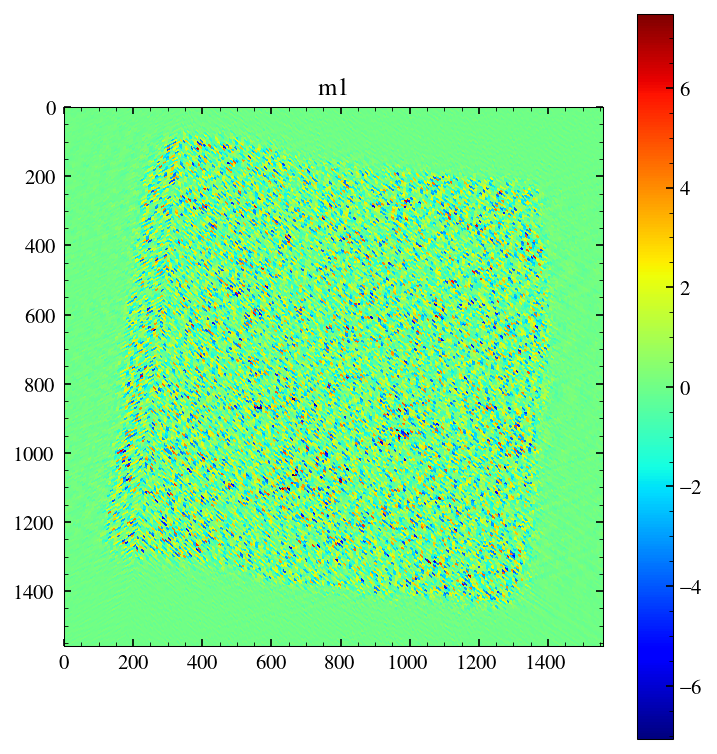

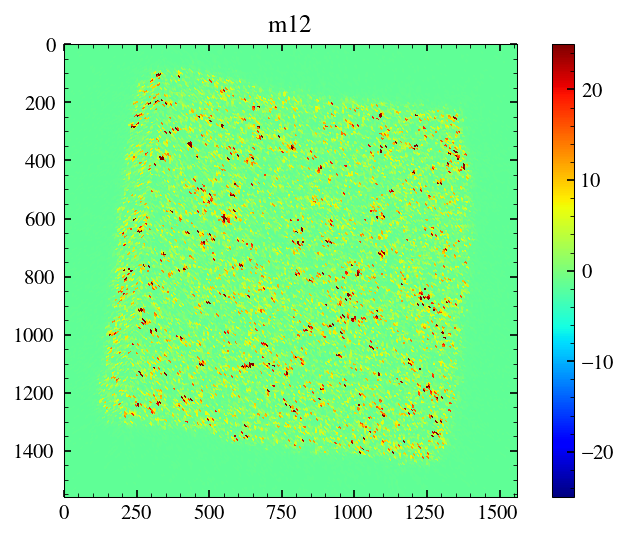

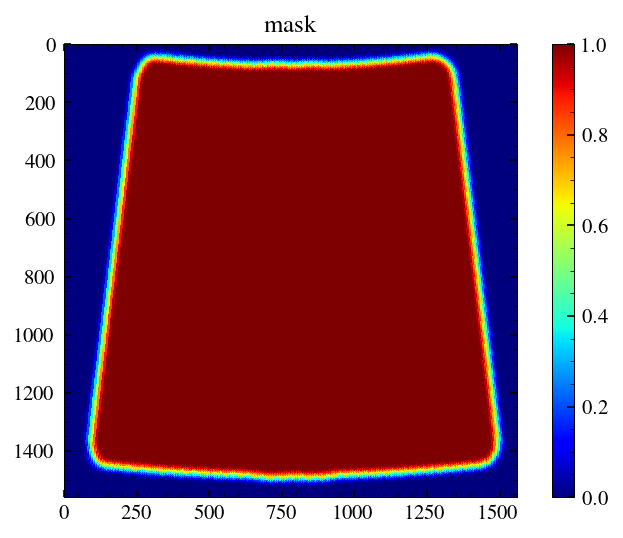

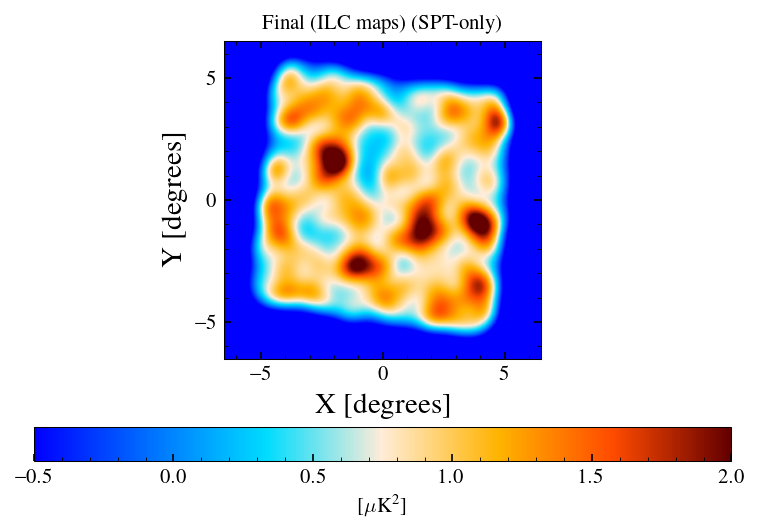

In [44]:
#compute 4-pt map
'''
m1 = m1 * 1e3
m2 = m2 * 1e3
m3 = m3 * 1e3
m4 = m4 * 1e3

m12 = (m1 * m2)
m34 = (m3 * m4)
print(m12, m34)
'''
print( np.mean(m1[unmasked_inds]) )

if (0):
    H.mollview( m1, min = -5., max = 5.); show()
    H.mollview( m12, min = -50., max = 50. ); show()

if (1): #pick a small region
    '''
    boxsize_am = 1200.
    angres = 1.0
    '''
    boxsize_am, angres = 780., 0.5    
    boxsize = int(boxsize_am/angres)
    cutout1 = H.gnomview(m1, rot=[352.5, -55.], xsize=boxsize, reso=angres, return_projected_map=True)
    close()
    #cutout2 = H.gnomview(m12, rot=[352.5, -55.], xsize=boxsize, reso=angres, return_projected_map=True)
    #cutout2 = H.gnomview(m12_full, rot=[352.5, -55.], xsize=boxsize, reso=angres, return_projected_map=True)
    cutout2 = H.gnomview(m12_noise, rot=[352.5, -55.], xsize=boxsize, reso=angres, return_projected_map=True)
    close()
    
    cutout2 = cutout2 - np.mean(cutout2)
    
    mask_cutout = H.gnomview(hmask_ds, rot=[352.5, -55.], xsize=boxsize, reso=angres, return_projected_map=True)
    subplot(111); imshow(cutout1); colorbar(); title(r'm1'); show()
    subplot(111); imshow(cutout2, vmin = -25, vmax = 25.); colorbar(); title(r'm12'); show()
    subplot(111); imshow(mask_cutout); colorbar(); title(r'mask'); show(); 

if (1):
    from spt3g.mapspectra import basicmaputils as utils
    reso_rad = np.radians(angres/60.)
    ny, nx = cutout2.shape
    lx, ly = utils.get_lxly(reso_rad, (ny, nx), real=False)
    ell_grid = np.sqrt( lx**2 + ly**2.)
    lpf = np.ones( ell_grid.shape )
    lpf[ell_grid>=500.] = 0.
    
    import flatsky
    import healpy as H
    bl = H.gauss_beam(np.radians(1.), 5000)
    ##bl = H.gauss_beam(np.radians(0.5), 5000)
    flatskymapparams = [ny, nx, angres, angres]
    ##rint(flatskymapparams)
    bl_2D = flatsky.cl_to_cl2d(np.arange(len(bl)), bl, flatskymapparams)
    ##plot(bl); show()
    ##imshow(np.fft.fftshift(bl_2D), extent = [np.min(lx), np.max(lx), np.min(ly), np.max(ly)]); colorbar(); xlim(-1000, 1000.); ylim(-1000, 1000.); show()
    
    import py_ini
    cmap = py_ini.get_planck_cmap()
    xmin, xmax = -boxsize_am/2., boxsize_am/2.
    xmin, xmax = xmin/60., xmax/60.
    
    cutout2_smoothed = np.fft.ifft2( np.fft.fft2(cutout2) * bl_2D).real
    ##cutout2_smoothed = np.fft.ifft2( np.fft.fft2(cutout2) * lpf).real * mask_cutout
    
    close('all')
    clf()
    ax = subplot(111)
    #vmin_smoothed, vmax_smoothed = None, None #-0.5, 0.5 ##3.5 #None, None #0., 10. #5.
    vmin_smoothed, vmax_smoothed = -0.5, 2. #-1., 5.
    imshow(cutout2_smoothed, extent = [xmin, xmax, xmin, xmax], cmap = cmap, vmin = vmin_smoothed, vmax = vmax_smoothed); 
    cbar=colorbar(orientation = 'horizontal')#, ticks = [vmin_smoothed, 0., vmax_smoothed])
    cbar.set_label('[$\mu$K$^{2}$]')
    tit_str = r'Final'
    if use_ilc_maps:
        tit_str = '%s (ILC maps)' %(tit_str)
        if ignore_herschel_data:
            tit_str = '%s (SPT-only)' %(tit_str)
    
    title(tit_str, fontsize = 10)
    xlabel(r'X [degrees]', fontsize = 14)
    ylabel(r'Y [degrees]', fontsize = 14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3)); ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    show()

[4.73268624e+00 1.28715501e+00 9.35760032e-04 ... 1.40751489e-03
 1.48106815e-02 2.91797007e-04] [4.73268624e+00 1.28715501e+00 9.35760032e-04 ... 1.40751489e-03
 1.48106815e-02 2.91797007e-04]


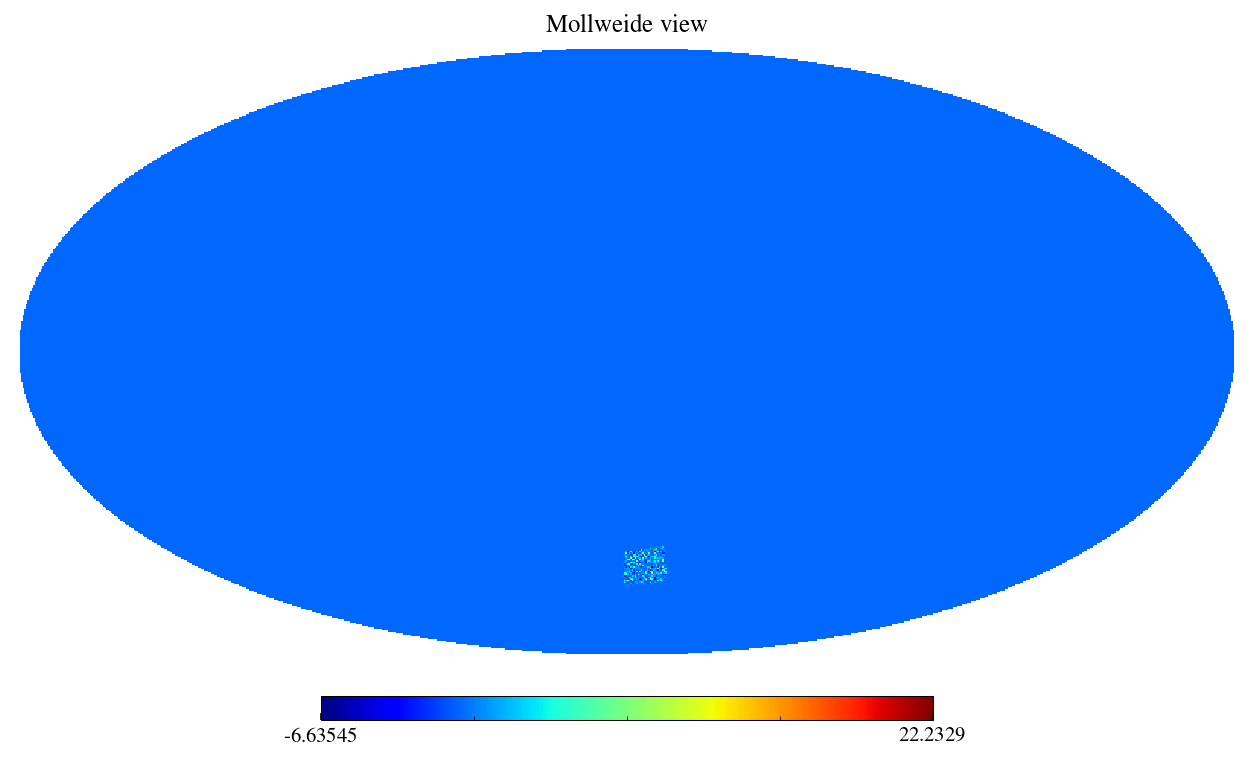

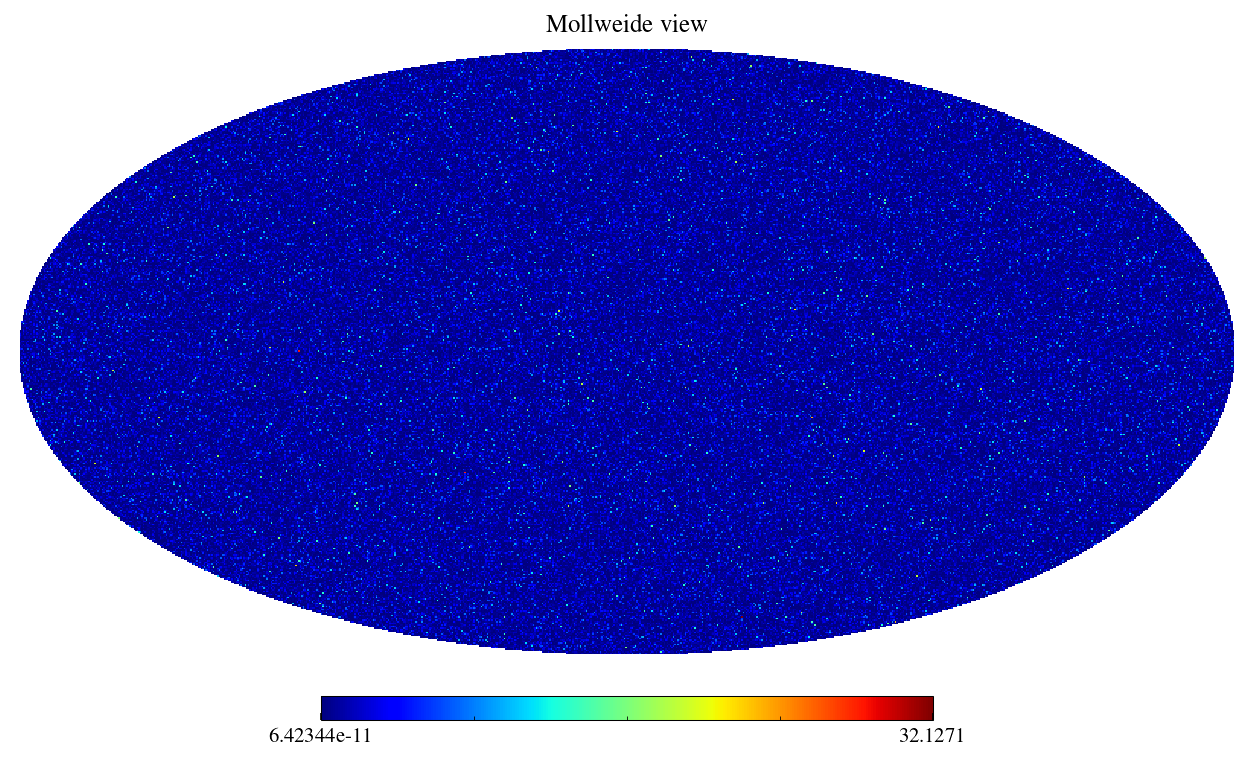

NameError: name 'm34' is not defined

In [79]:
m12_gauss = (m1_gauss * m2_gauss ) * 1e6
m34_gauss = (m3_gauss * m4_gauss ) * 1e6
print(m12_gauss, m34_gauss)

H.mollview( m12 ); show()
H.mollview( m12_gauss ); show()


cl_4pt = H.anafast(m12, m34, lmax = 500) / fsky
cl_4pt_gauss = H.anafast(m12_gauss, m34_gauss, lmax = 500)

In [ ]:
el_4pt = np.arange(len(cl_4pt))
#ymin, ymax = 1e-6, 5e-1
ymin, ymax = 5e-5, 5e-1
fsval = 14
clf()
ax = subplot(111, yscale = 'log')
dl_fac_4pt = el_4pt * (el_4pt+1)/2/np.pi
plot(el_4pt, dl_fac_4pt * cl_4pt, color = 'black')
plot(el_4pt, dl_fac_4pt * cl_4pt_gauss, color = 'orangered')
xlim(2., 1000.); 
ylim(ymin, ymax)
##legend(loc = 'best', fontsize = fsval-4, ncol = 1)
xlabel(r'Multipole $L$', fontsize = fsval)
ylabel(r'$L^{2}C_{L}^{KK}/2\pi$ [$\mu$K$^{4}$]', fontsize = fsval)
#title(tit_str, fontsize = 14)
show()